In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import resi = si.fit(IDF[['property_damage']])

In [20]:
IDF = pd.read_csv('https://raw.githubusercontent.com/RimaDas89/Insurance-Claim-Fraud-Detection/main/Automobile_insurance_fraud.csv')
IDF


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [21]:
IDF.shape

(1000, 40)

In [22]:
IDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Checking for Null values

In [23]:
IDF.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Checking for blank spaces, random characters in each column

In [24]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in IDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((IDF[c] == s).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


There are null values in columns: collision_type,property_damage,police_report_available and _c39

In [25]:
IDF

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

_c39 has no usable data present. Other columns appear to have no null values. Therefore it will be dropped.

Checking for unique categories in the categorical columns with null values

In [26]:
IDF.collision_type.unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type

<Axes: xlabel='collision_type', ylabel='count'>

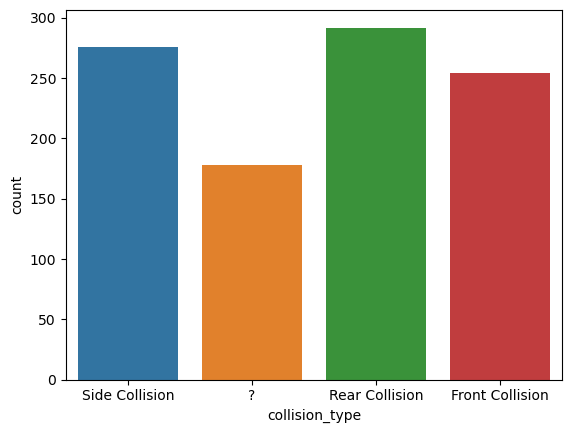

In [29]:
sns.countplot(x='collision_type',data=IDF)

In [30]:
IDF.collision_type.mode()

0    Rear Collision
Name: collision_type, dtype: object

In [32]:
IDF.collision_type.isnull().sum()/1000*100

0.0

In [33]:
(IDF['collision_type'] == 'Rear Collision').sum()/IDF.collision_type.count()*100 

29.2

29.2 of data in collision type is Rear collision

Therefore imputing 'Rear Collision' to NaN values in collision_type column

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [36]:
si = si.fit(IDF[['collision_type']])

In [37]:
IDF[['collision_type']] = si.transform(IDF[['collision_type']])

In [38]:
IDF[['collision_type']].isnull().sum()

collision_type    0
dtype: int64

In [39]:
IDF.property_damage.unique()

array(['YES', '?', 'NO'], dtype=object)

There are 2 unique categories in property_damage

<Axes: xlabel='property_damage', ylabel='count'>

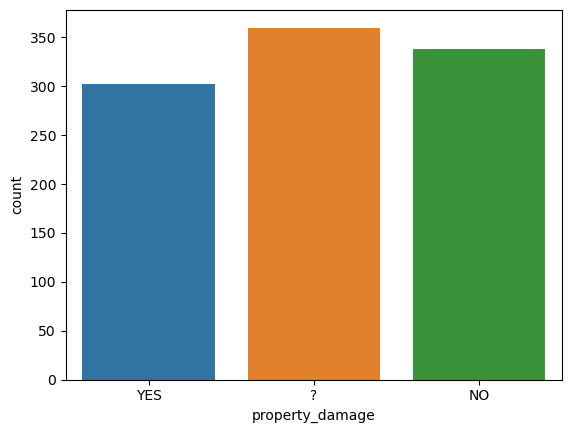

In [41]:
sns.countplot(x='property_damage', data=IDF)

In [42]:
IDF.property_damage.mode()

0    ?
Name: property_damage, dtype: object

In [43]:
IDF.property_damage.isnull().sum()/1000*100

0.0

In [44]:
(IDF['property_damage'] == 'NO').sum()/IDF.property_damage.count()*100

33.800000000000004

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [47]:
si = si.fit(IDF[['property_damage']])

In [48]:
IDF[['property_damage']] = si.transform(IDF[['property_damage']])

In [49]:
IDF[['property_damage']].isnull().sum()

property_damage    0
dtype: int64

In [50]:
IDF.police_report_available.unique()


array(['YES', '?', 'NO'], dtype=object)

<Axes: xlabel='police_report_available', ylabel='count'>

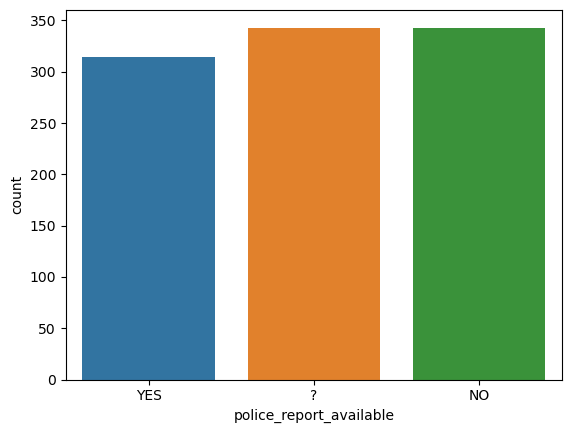

In [52]:
sns.countplot(x='police_report_available', data=IDF)

In [53]:
IDF.police_report_available.mode()

0     ?
1    NO
Name: police_report_available, dtype: object

In [54]:
IDF.police_report_available.isnull().sum()/1000*100

0.0

In [55]:
(IDF['police_report_available'] == 'NO').sum()/IDF.police_report_available.count()*100

34.300000000000004

Therefore imputing 'No' to NaN values in police_report_available column

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [58]:
si = si.fit(IDF[['police_report_available']])

In [59]:
IDF[['police_report_available']] = si.transform(IDF[['police_report_available']])

In [60]:
IDF[['police_report_available']].isnull().sum()

police_report_available    0
dtype: int64

In [61]:
IDF.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [62]:
IDF.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('fraud_reported') data type indicates that dependent variable data is categorical in nature.¶

Getting the basic summary and statistical information of the data.

In [64]:
IDF.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [65]:
IDF.dtypes[IDF.dtypes == 'object']

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [69]:
IDF.dtypes[IDF.dtypes != 'object'] 

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
_c39                           float64
dtype: object

In [70]:
IDF.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

Difference in mean and 50% and considerable difference in 75% and max of columns months_as_customer,policy_annual_premium,capital-gains,total_claim_amount,injury_claim and property_claim suggests skewness in respective data distributions and presence of outliers.

This is a Classification Problem since the Target variable / Label column ("fraud_reported") has Catergorical type of Data.

Analyzing the Target Class

In [68]:
IDF['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

There are 2 unique catergorical values in the Label column / target variable.

In [71]:
IDF['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Class 'N' : Has 753 values

<Axes: xlabel='fraud_reported', ylabel='count'>

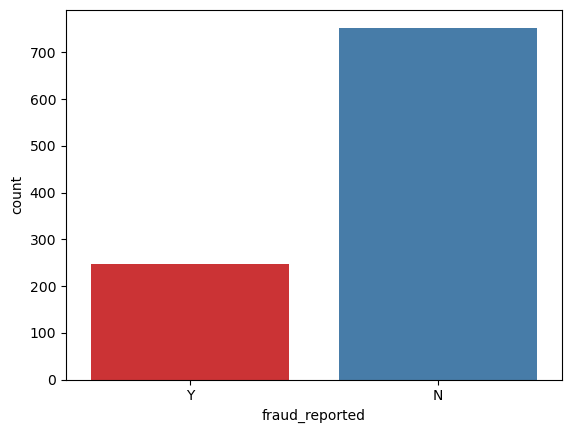

In [73]:
sns.countplot(data=IDF, x='fraud_reported', palette="Set1")

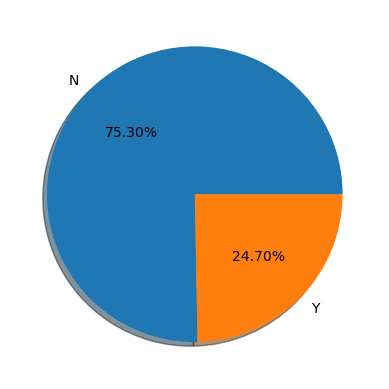

In [74]:
labels = 'N','Y'
fig, ax = plt.subplots()
ax.pie(IDF['fraud_reported'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class 'N' : Has 75.30% of total values

'Y' : Has 24.70% of total values

Classes are imbalanced.

Analyzing Feature columns Catergorical Classes

In [75]:
IDF.dtypes[IDF.dtypes == 'object']

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [76]:
IDF['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

Extracting 'year' from policy_bind_date

In [78]:
IDF['policy_bind_date']=pd.to_datetime(IDF['policy_bind_date'])

In [79]:
IDF['Bind_Year']=IDF['policy_bind_date'].apply(lambda y:y.year)

In [80]:
IDF.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       466132  ...              71610         6510          13020   
1       468176  ...               5070          780            780   
2       430632  ...              34650         7700           3850   
3       608117  ...              63400         6340           6340   
4       610706  ...               6500         1300            650   

  vehicle_claim  auto_make  auto_model  auto_year fraud_reported _c39  \
0         52080       Saab         92x       2004              Y  NaN   
1          3510   Mercedes        E400       2007              Y  NaN   
2         23100      Dodge         RAM       2007              N  NaN   
3         50720  Chevrolet       Tahoe       2014              Y  NaN   
4          4550     Accura         RSX       2009              N  NaN   

  Bind_Year  
0      2014  
1      2006  
2      2000  
3      1990  
4      2014  

[5 rows x 41 columns]

Dropping the column 'policy_bind_date' since it is no longer needed

In [81]:
IDF.drop(columns = ['policy_bind_date'],inplace = True)

In [82]:
IDF.Bind_Year.max() 

2015

Extracting 'Age' of policy bind from bind_year

In [83]:
IDF['Bind_Age'] = IDF['Bind_Year'].apply(lambda y: 2016 - y)
IDF

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... injury_claim property_claim vehicle_claim   auto_make  \
0          MALE  ...         6510          13020         52080        Saab   
1          MALE  ...          780            780          3510    Mercedes   
2        FEMALE  ...         7700           3850         23100       Dodge   
3        FEMALE  ...         6340           6340         50720   Chevrolet   
4          MALE  ...         1300            650          4550      Accura   
..          ...  ...          ...            ...           ...         ...   
995      FEMALE  ...        17440           8720         61040       Honda   
996      FEMALE  ...        18080          18080         72320  Volkswagen   
997      FEMALE  ...         7500           7500         52500      Suburu   
998        MALE  ...         5220           5220         36540        Audi   
999      FEMALE  ...          460            920          3680    Mercedes   

     auto_model  auto_year fraud_reported _c39 Bind_Year Bind_Age  
0           92x       2004              Y  NaN      2014        2  
1          E400       2007              Y  NaN      2006       10  
2           RAM       2007              N  NaN      2000       16  
3         Tahoe       2014              Y  NaN      1990       26  
4           RSX       2009              N  NaN      2014        2  
..          ...        ...            ...  ...       ...      ...  
995      Accord       2006              N  NaN      1991       25  
996      Passat       2015              N  NaN      2014        2  
997     Impreza       1996              N  NaN      2003       13  
998          A5       1998              N  NaN      2011        5  
999        E400       2007              N  NaN      1996       20  

[1000 rows x 41 columns]

Dropping the column 'policy_bind_date' since it is no longer needed.

In [84]:
IDF.drop(columns = ['Bind_Year'],inplace = True)

In [85]:
IDF['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<Axes: xlabel='policy_state', ylabel='count'>

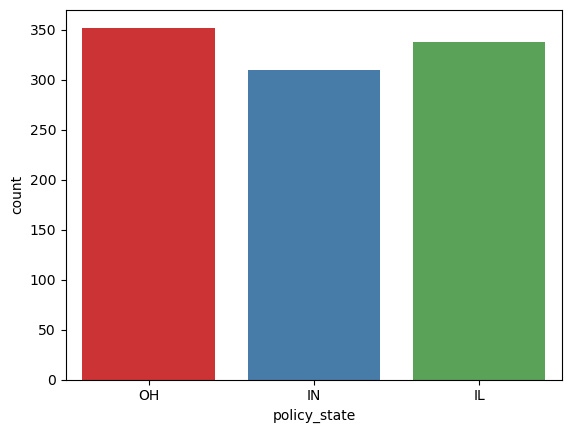

In [88]:
# Drop missing values in the 'policy_state' column
IDF_clean = IDF.dropna(subset=['policy_state'])

# Now create the count plot for the cleaned data
sns.countplot(x='policy_state', data=IDF_clean, palette="Set1")

In [89]:
IDF['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

<Axes: xlabel='policy_csl', ylabel='count'>

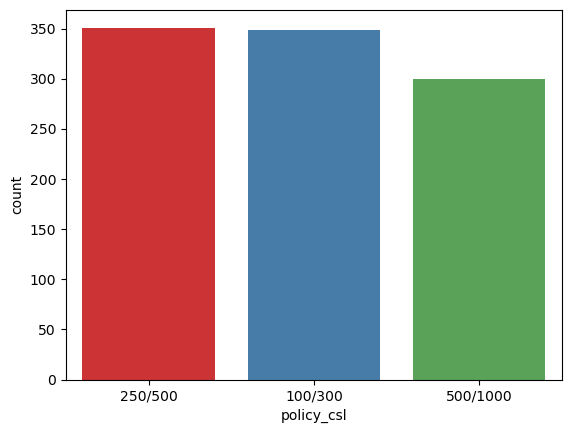

In [90]:
sns.countplot(data=IDF, x='policy_csl', palette="Set1")

In [91]:
IDF['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<Axes: xlabel='insured_sex', ylabel='count'>

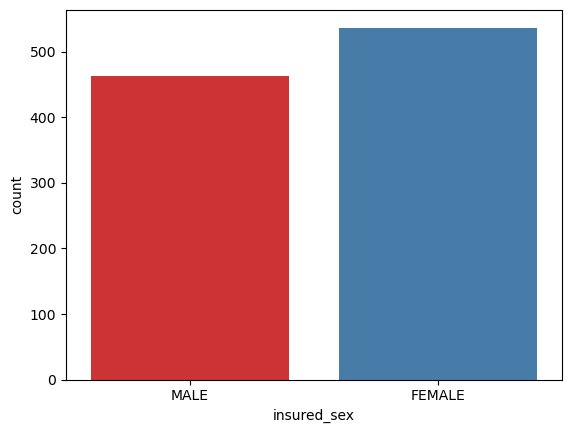

In [93]:
sns.countplot(x='insured_sex', data=IDF_clean, palette="Set1")

In [94]:
IDF['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<Axes: xlabel='insured_education_level', ylabel='count'>

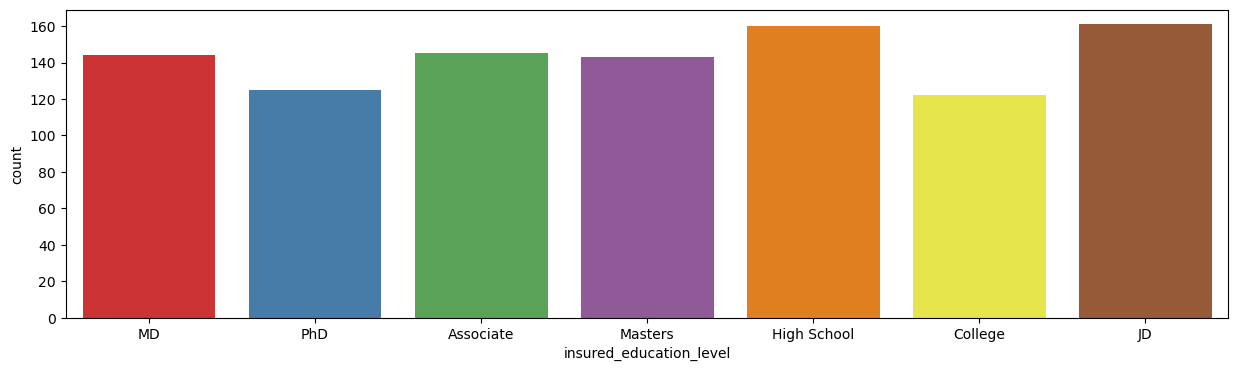

In [97]:
plt.figure(figsize=(15, 4), facecolor='white')
sns.countplot(x='insured_education_level', data=IDF_clean, palette="Set1")

In [98]:
IDF['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<Axes: xlabel='insured_occupation', ylabel='count'>

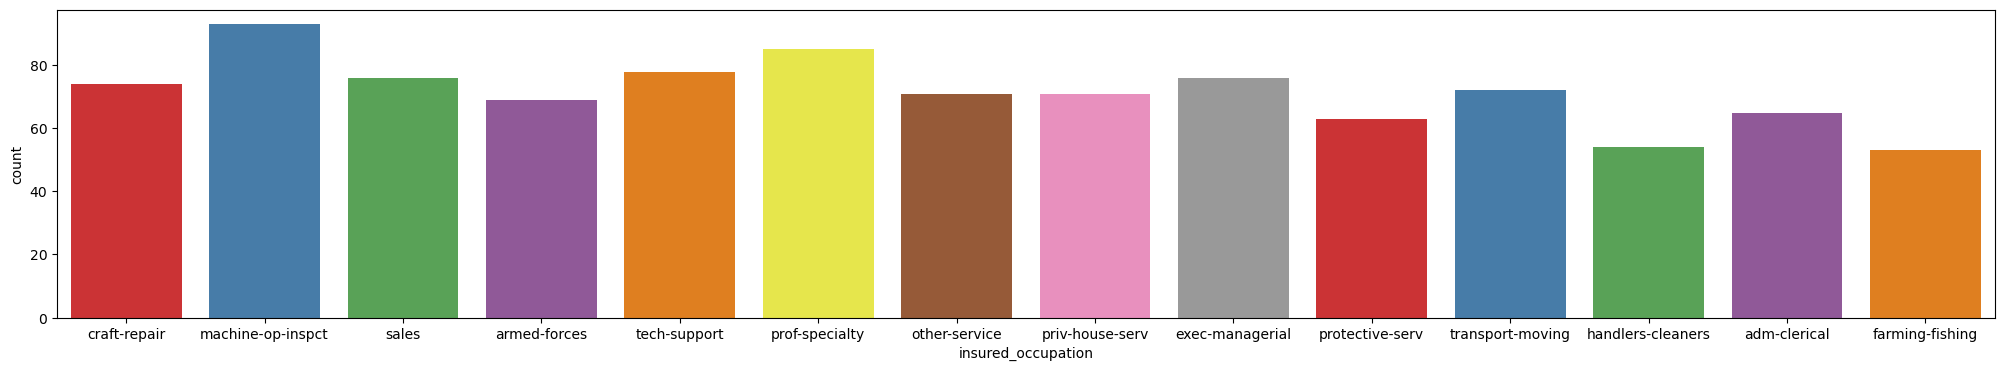

In [99]:
plt.figure(figsize=(25, 4), facecolor='white')
sns.countplot(x='insured_occupation', data=IDF_clean, palette="Set1")


machine-op-inspct and prof-specialty are the most common occupations.

In [100]:
IDF['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<Axes: xlabel='insured_hobbies', ylabel='count'>

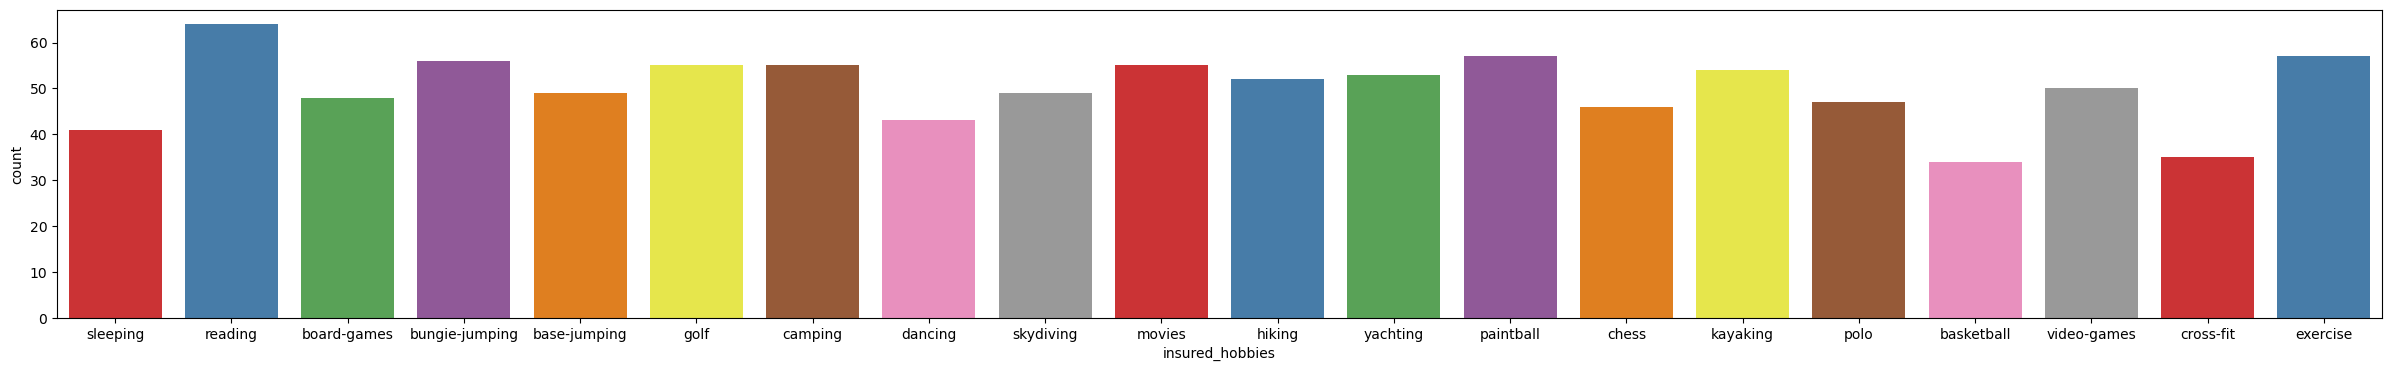

In [101]:
plt.figure(figsize=(30, 4), facecolor='white')
sns.countplot(data=IDF, x='insured_hobbies', palette="Set1")

In [102]:
IDF['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

Extracting Incident Month from incident_date

In [103]:
IDF['incident_date']=pd.to_datetime(IDF['incident_date'])

In [104]:
IDF['incident_month']=IDF['incident_date'].apply(lambda m:m.month)

In [105]:
IDF.drop(columns=['incident_date'],inplace=True)

In [106]:
IDF.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... injury_claim property_claim vehicle_claim  auto_make  \
0        MALE  ...         6510          13020         52080       Saab   
1        MALE  ...          780            780          3510   Mercedes   
2      FEMALE  ...         7700           3850         23100      Dodge   
3      FEMALE  ...         6340           6340         50720  Chevrolet   
4        MALE  ...         1300            650          4550     Accura   

   auto_model  auto_year fraud_reported _c39 Bind_Age incident_month  
0         92x       2004              Y  NaN        2              1  
1        E400       2007              Y  NaN       10              1  
2         RAM       2007              N  NaN       16              2  
3       Tahoe       2014              Y  NaN       26             10  
4         RSX       2009              N  NaN        2              2  

[5 rows x 40 columns]

In [108]:
IDF['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<Axes: xlabel='incident_type', ylabel='count'>

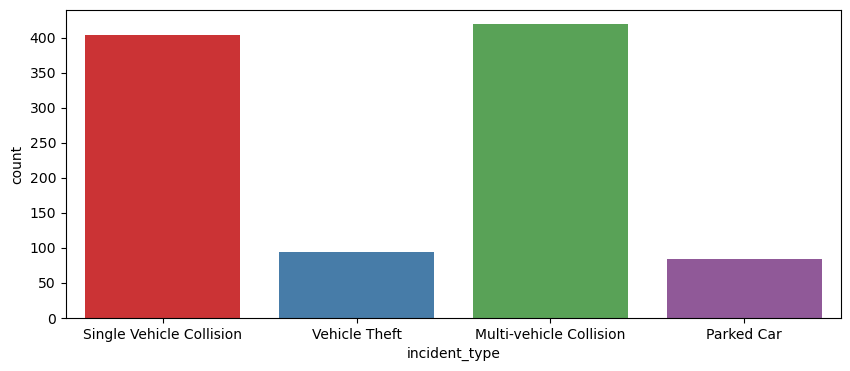

In [109]:
plt.figure(figsize=(10, 4), facecolor='white')
sns.countplot(data=IDF, x='incident_type', palette="Set1")

In [110]:
IDF['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

<Axes: xlabel='collision_type', ylabel='count'>

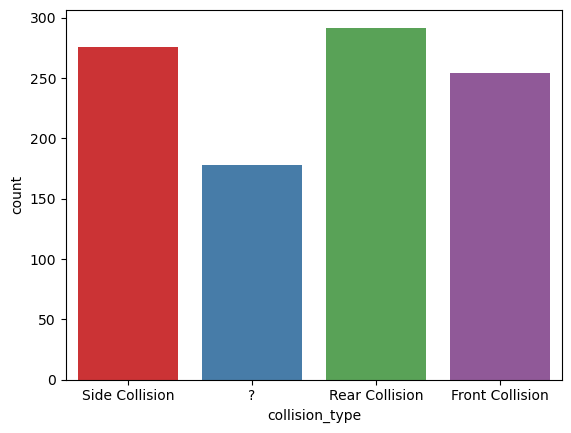

In [111]:
sns.countplot(data=IDF, x='collision_type', palette="Set1")

Majority of cases are Rear Collision.

In [112]:
IDF['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

There are 4 unique categories in incident_severity

<Axes: xlabel='incident_severity', ylabel='count'>

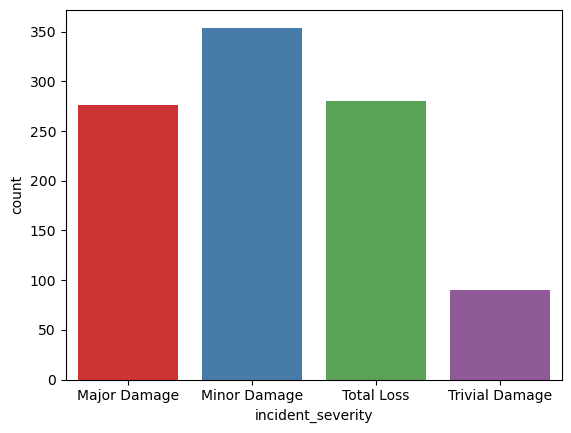

In [113]:
 sns.countplot(data=IDF, x='incident_severity', palette="Set1")

In [114]:
IDF['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

There are 5 unique Categories

<Axes: xlabel='authorities_contacted', ylabel='count'>

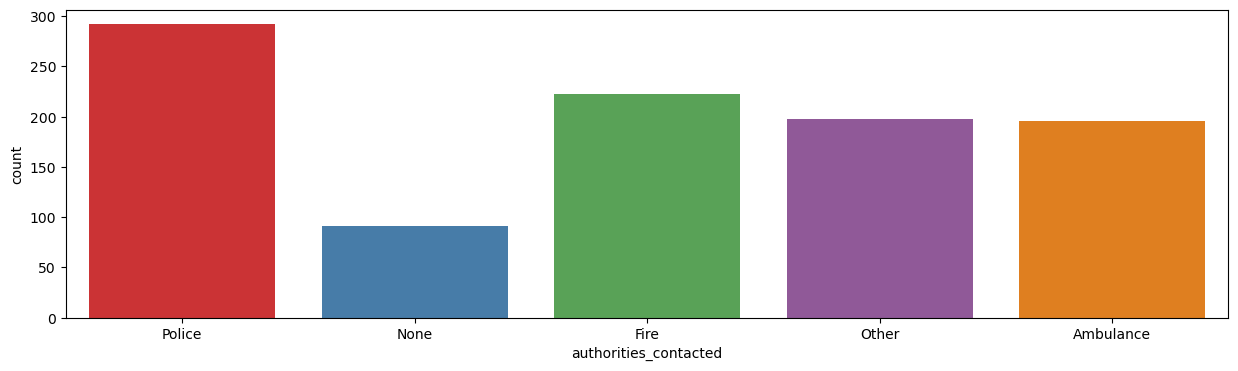

In [115]:
plt.figure(figsize=(15, 4), facecolor='white')
sns.countplot(data=IDF, x='authorities_contacted', palette="Set1")

In [116]:
IDF['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

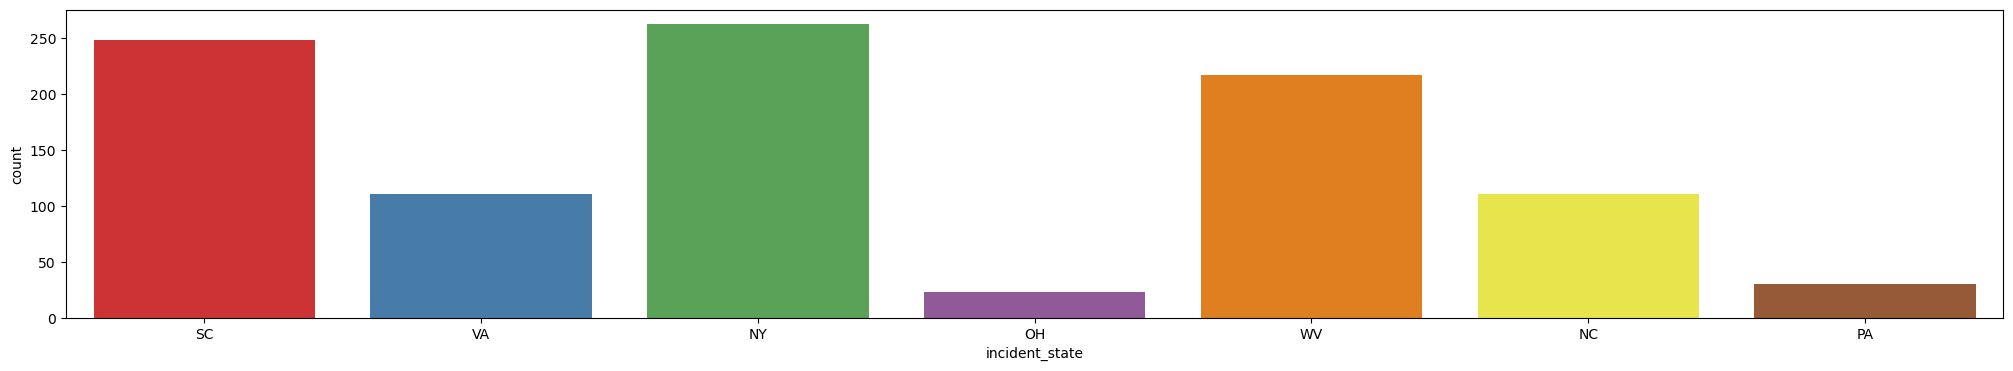

In [117]:
plt.figure(figsize=(25, 4), facecolor='white')
sns.countplot(data=IDF, x='incident_state', palette="Set1")

In [118]:
IDF['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<Axes: xlabel='incident_city', ylabel='count'>

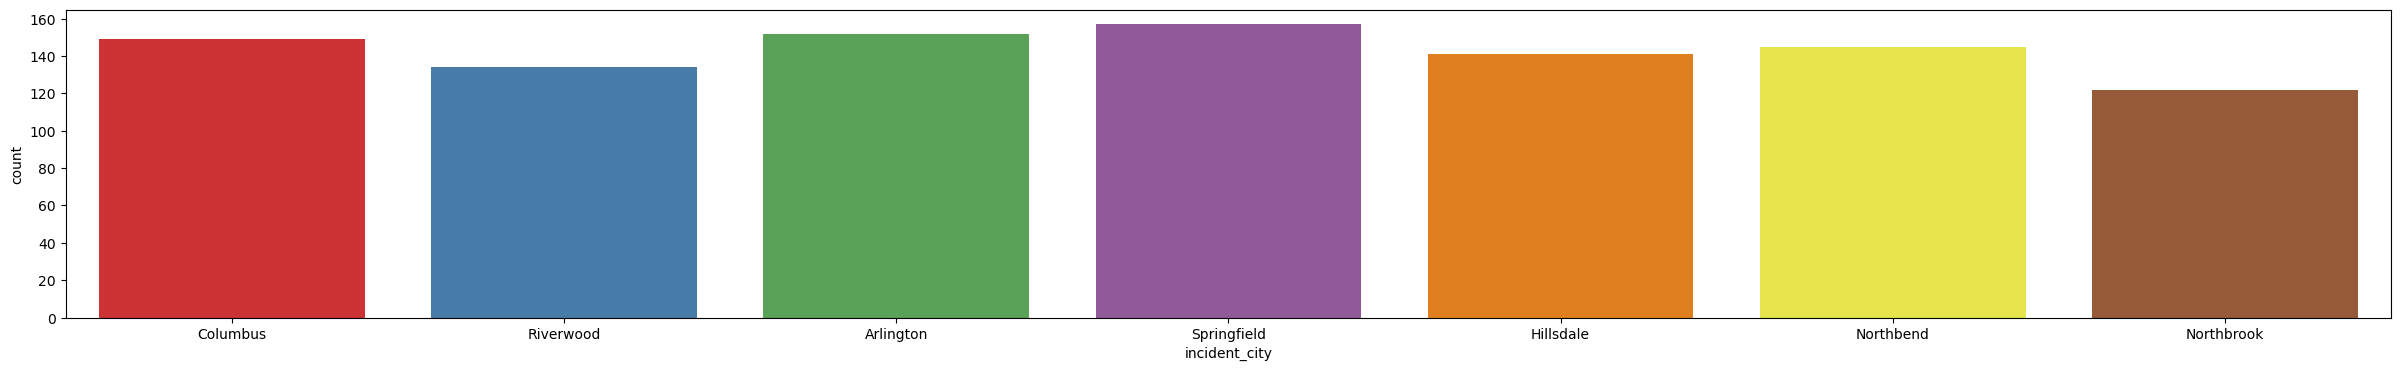

In [119]:
plt.figure(figsize=(30, 4), facecolor='white')
sns.countplot(data=IDF, x='incident_city', palette="Set1")

Most incidents were reported from Columbus,Arlington, Springfield

In [121]:
IDF['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [122]:
IDF['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<Axes: xlabel='property_damage', ylabel='count'>

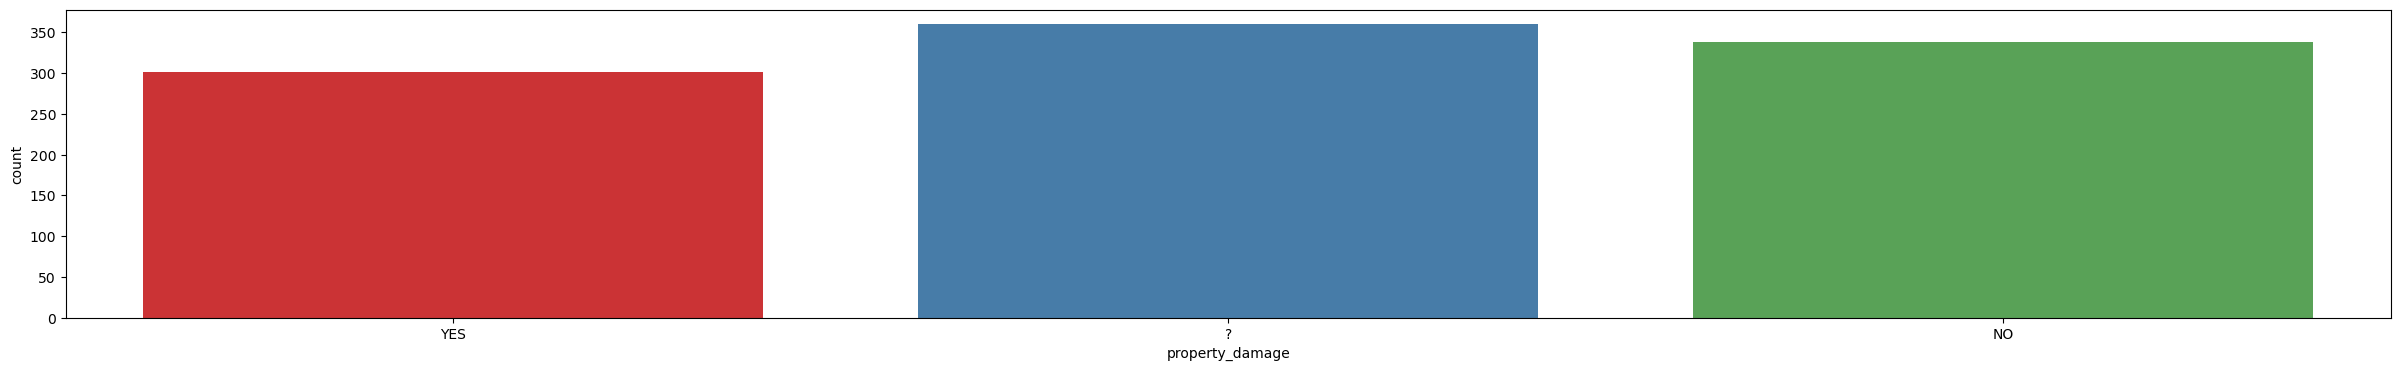

In [123]:
plt.figure(figsize=(30, 4), facecolor='white')
sns.countplot(data=IDF, x='property_damage', palette="Set1")

In [124]:
IDF['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

<Axes: xlabel='police_report_available', ylabel='count'>

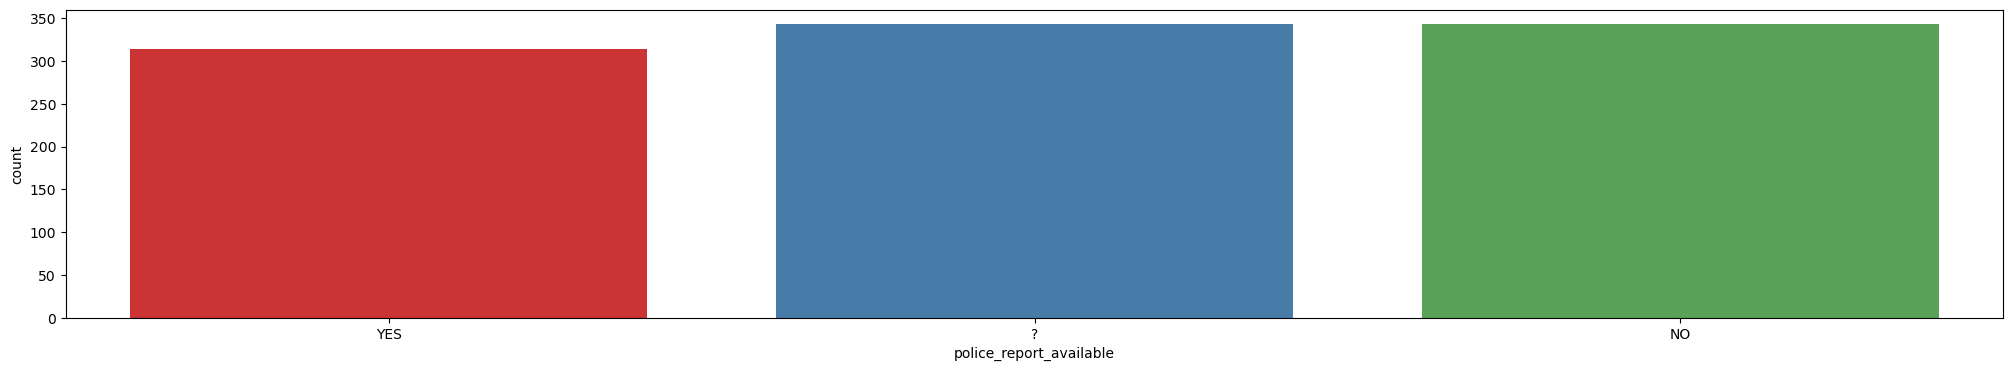

In [125]:
plt.figure(figsize=(25, 4), facecolor='white')
sns.countplot(data=IDF, x='police_report_available', palette="Set1")

In [126]:
IDF['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<Axes: xlabel='auto_make', ylabel='count'>

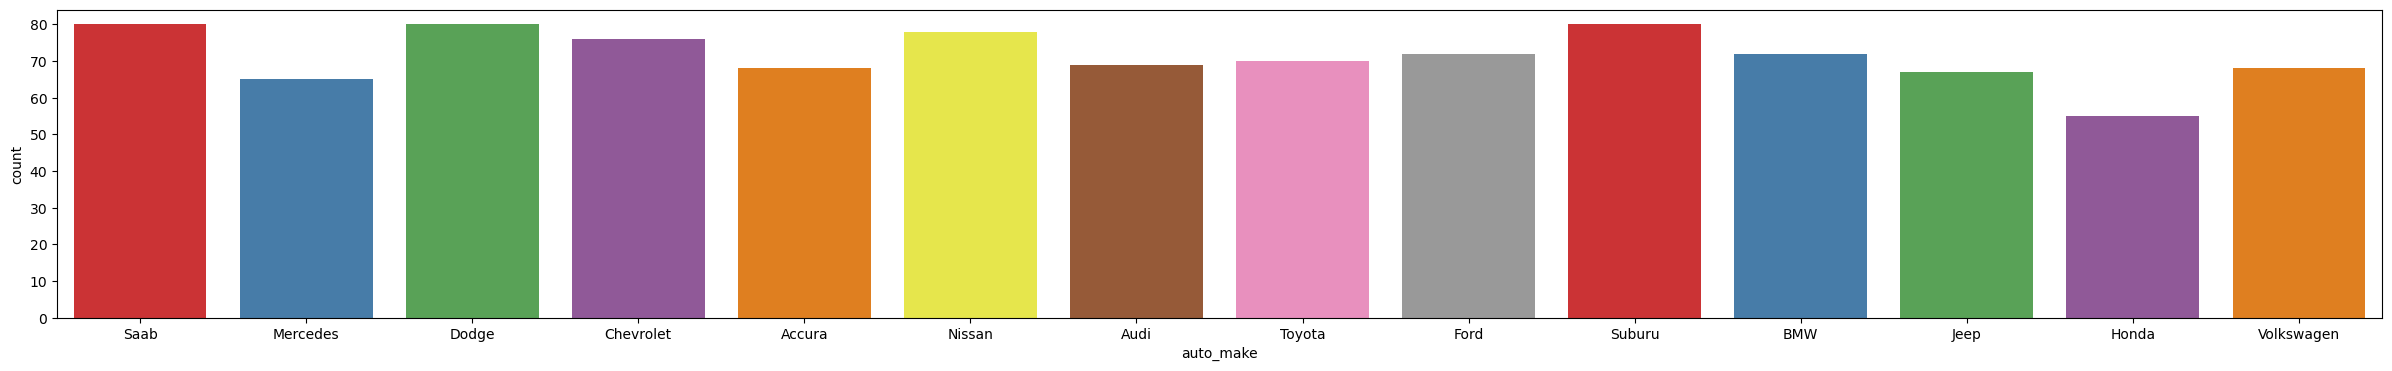

In [127]:
plt.figure(figsize=(30, 4), facecolor='white')
sns.countplot(x='auto_make', data=IDF_clean, palette="Set1")

In [128]:
IDF['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<Axes: xlabel='auto_model', ylabel='count'>

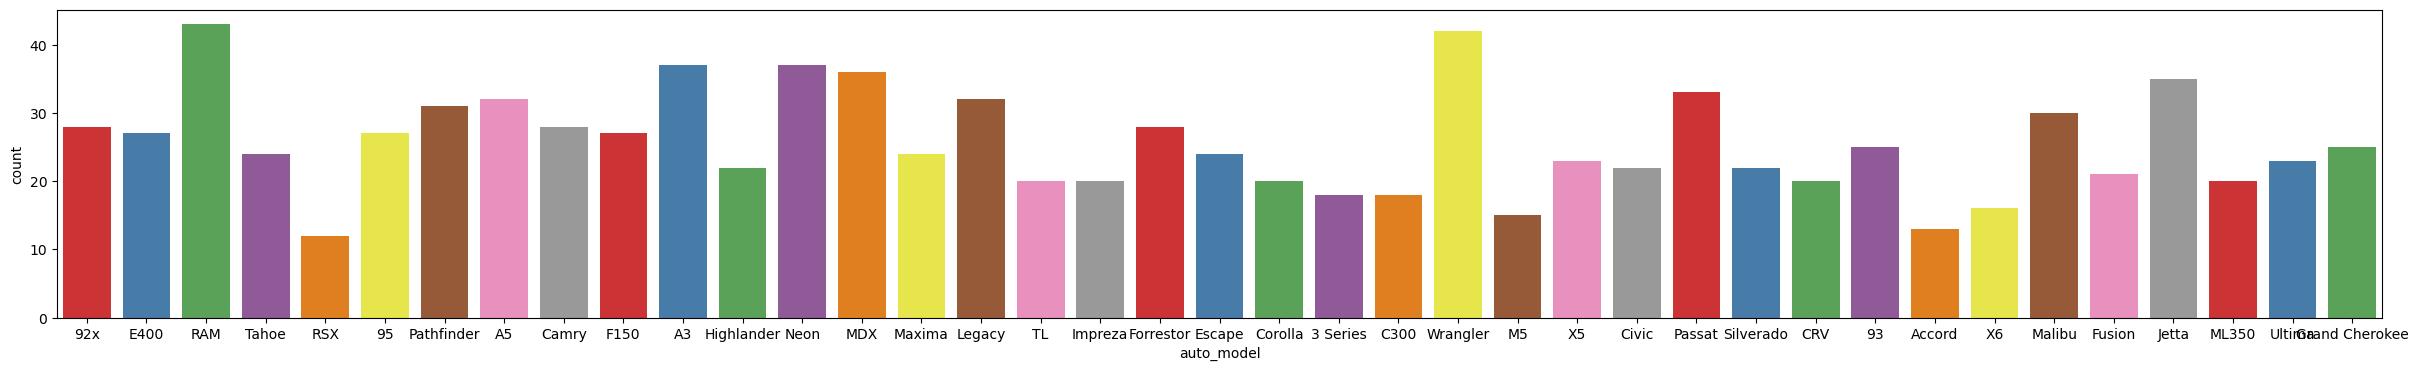

In [129]:
plt.figure(figsize=(30, 4), facecolor='white')
sns.countplot(data=IDF, x='auto_model', palette="Set1")

Analyzing Feature columns with Continuous Data

In [130]:
IDF.dtypes[IDF.dtypes != 'object'] 

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
_c39                           float64
Bind_Age                         int64
incident_month                   int64
dtype: object

In [131]:
IDF['auto_age'] = IDF['auto_year'].apply(lambda y: 2016 - y)

In [132]:
IDF.drop(columns=['auto_year'],inplace=True)

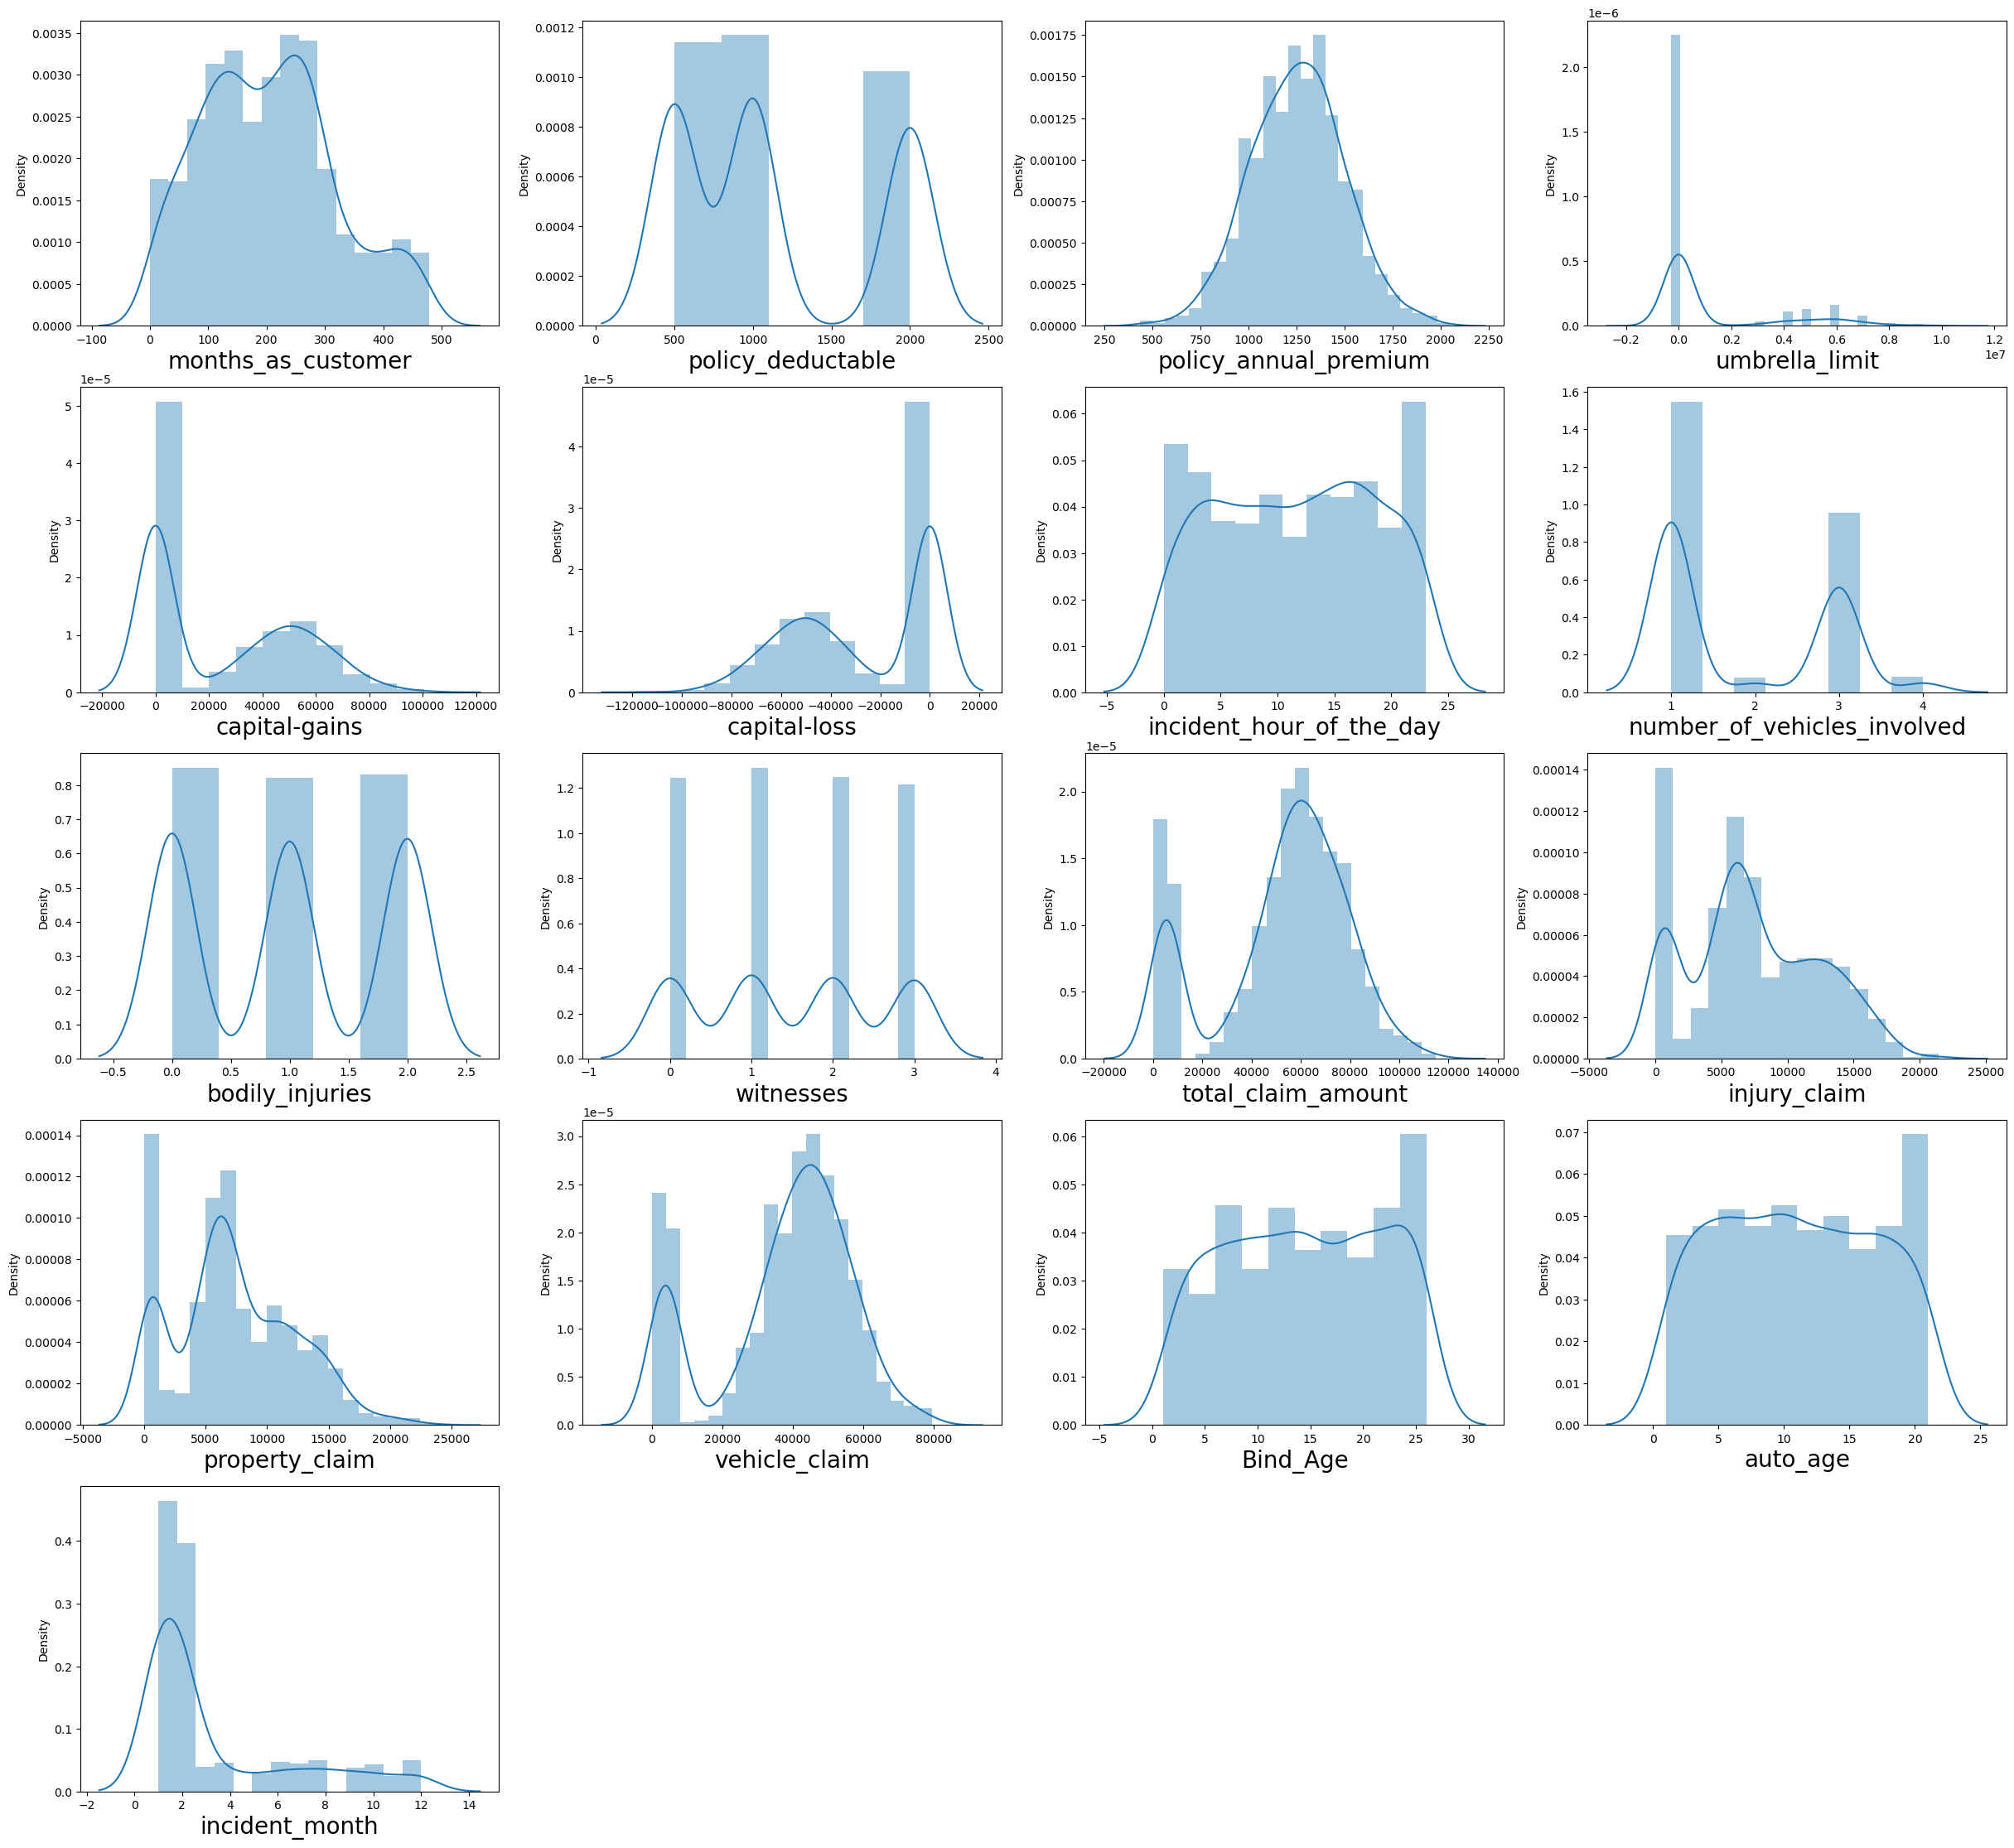

In [133]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in IDF[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age','incident_month']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(IDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Most continuous distributions are normally distributed and are multimodal.

In [134]:
IDF.incident_month.value_counts()

1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64

<Axes: xlabel='incident_month', ylabel='count'>

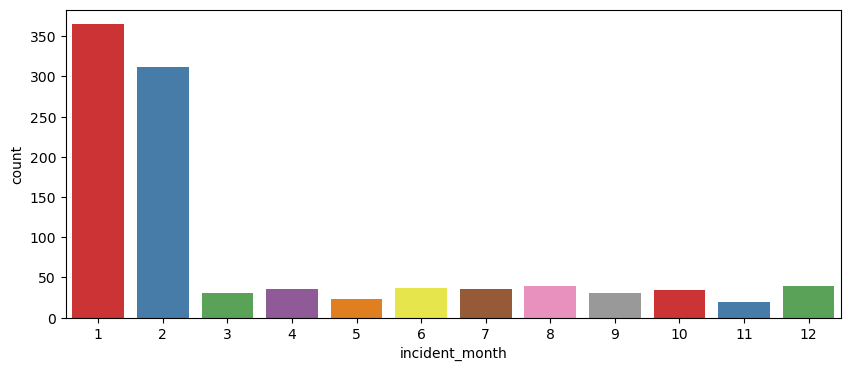

In [136]:
plt.figure(figsize=(10, 4), facecolor='white')
sns.countplot(data=IDF, x='incident_month', palette="Set1")

Most incidents take place between January and February

In [137]:
IDF[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age']].skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
auto_age                       0.048289
dtype: float64

Dropping unecessary columns

In [138]:
IDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [139]:
IDF.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)

IDF.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... injury_claim property_claim  vehicle_claim  \
0       craft-repair  ...         6510          13020          52080   
1  machine-op-inspct  ...          780            780           3510   
2              sales  ...         7700           3850          23100   
3       armed-forces  ...         6340           6340          50720   
4              sales  ...         1300            650           4550   

   auto_make auto_model fraud_reported _c39 Bind_Age incident_month auto_age  
0       Saab        92x              Y  NaN        2              1       12  
1   Mercedes       E400              Y  NaN       10              1        9  
2      Dodge        RAM              N  NaN       16              2        9  
3  Chevrolet      Tahoe              Y  NaN       26             10        2  
4     Accura        RSX              N  NaN        2              2        7  

[5 rows x 37 columns]

'Income' vs Continuous/Discrete Data Columns

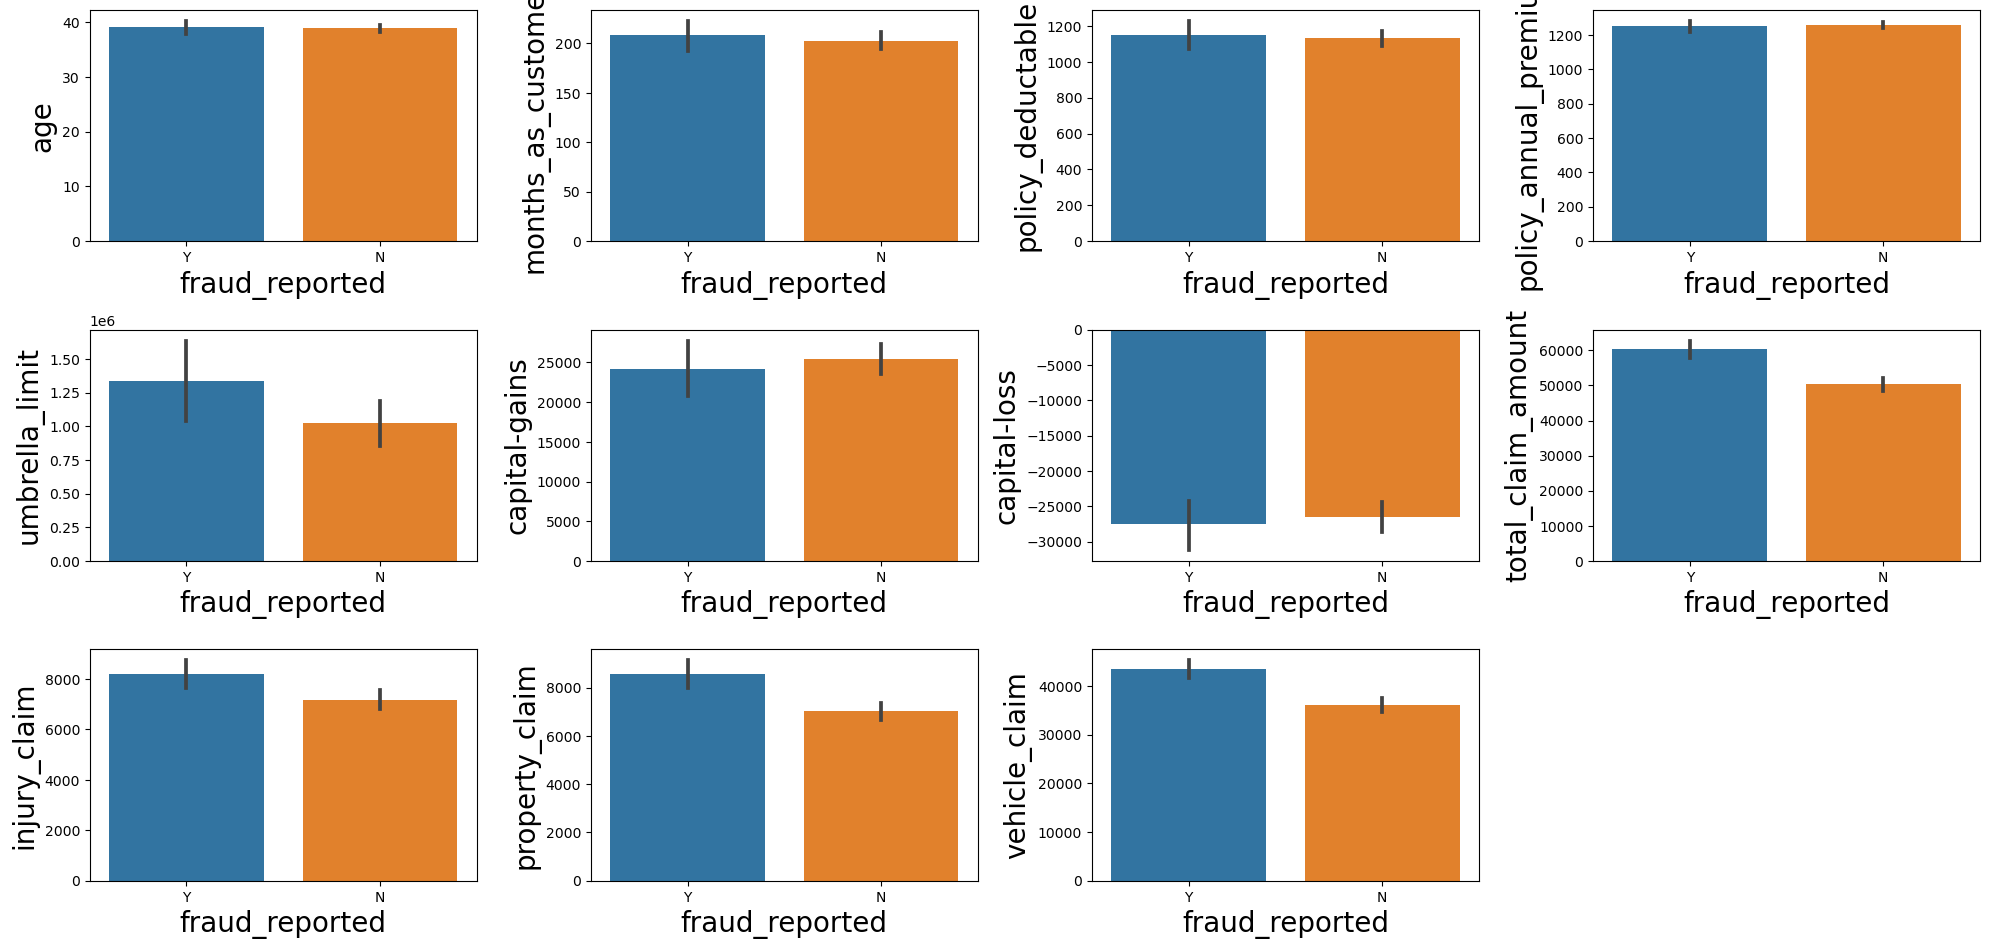

In [141]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = IDF['fraud_reported']
X = IDF[['age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
for col in X:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.barplot(x=y,y=X[col])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()


Following observations can be made from above graphs:

'age','months_as_customer','policy_deductable','policy_annual_premium','capital-gains','capital-loss', don't seem to contribute to fraud probability.

Higher the umbrella limit, more the fraud claims are filed.

Higher the total claim amount, more the fraud claims are filed.

Higher the injury claim amount, more the fraud claims are filed.

Higher the property claim amount, more the fraud claims are filed.

Higher the vehicle claim amount, more the fraud claims are filed.

'Income' vs Categorical Data Columns

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

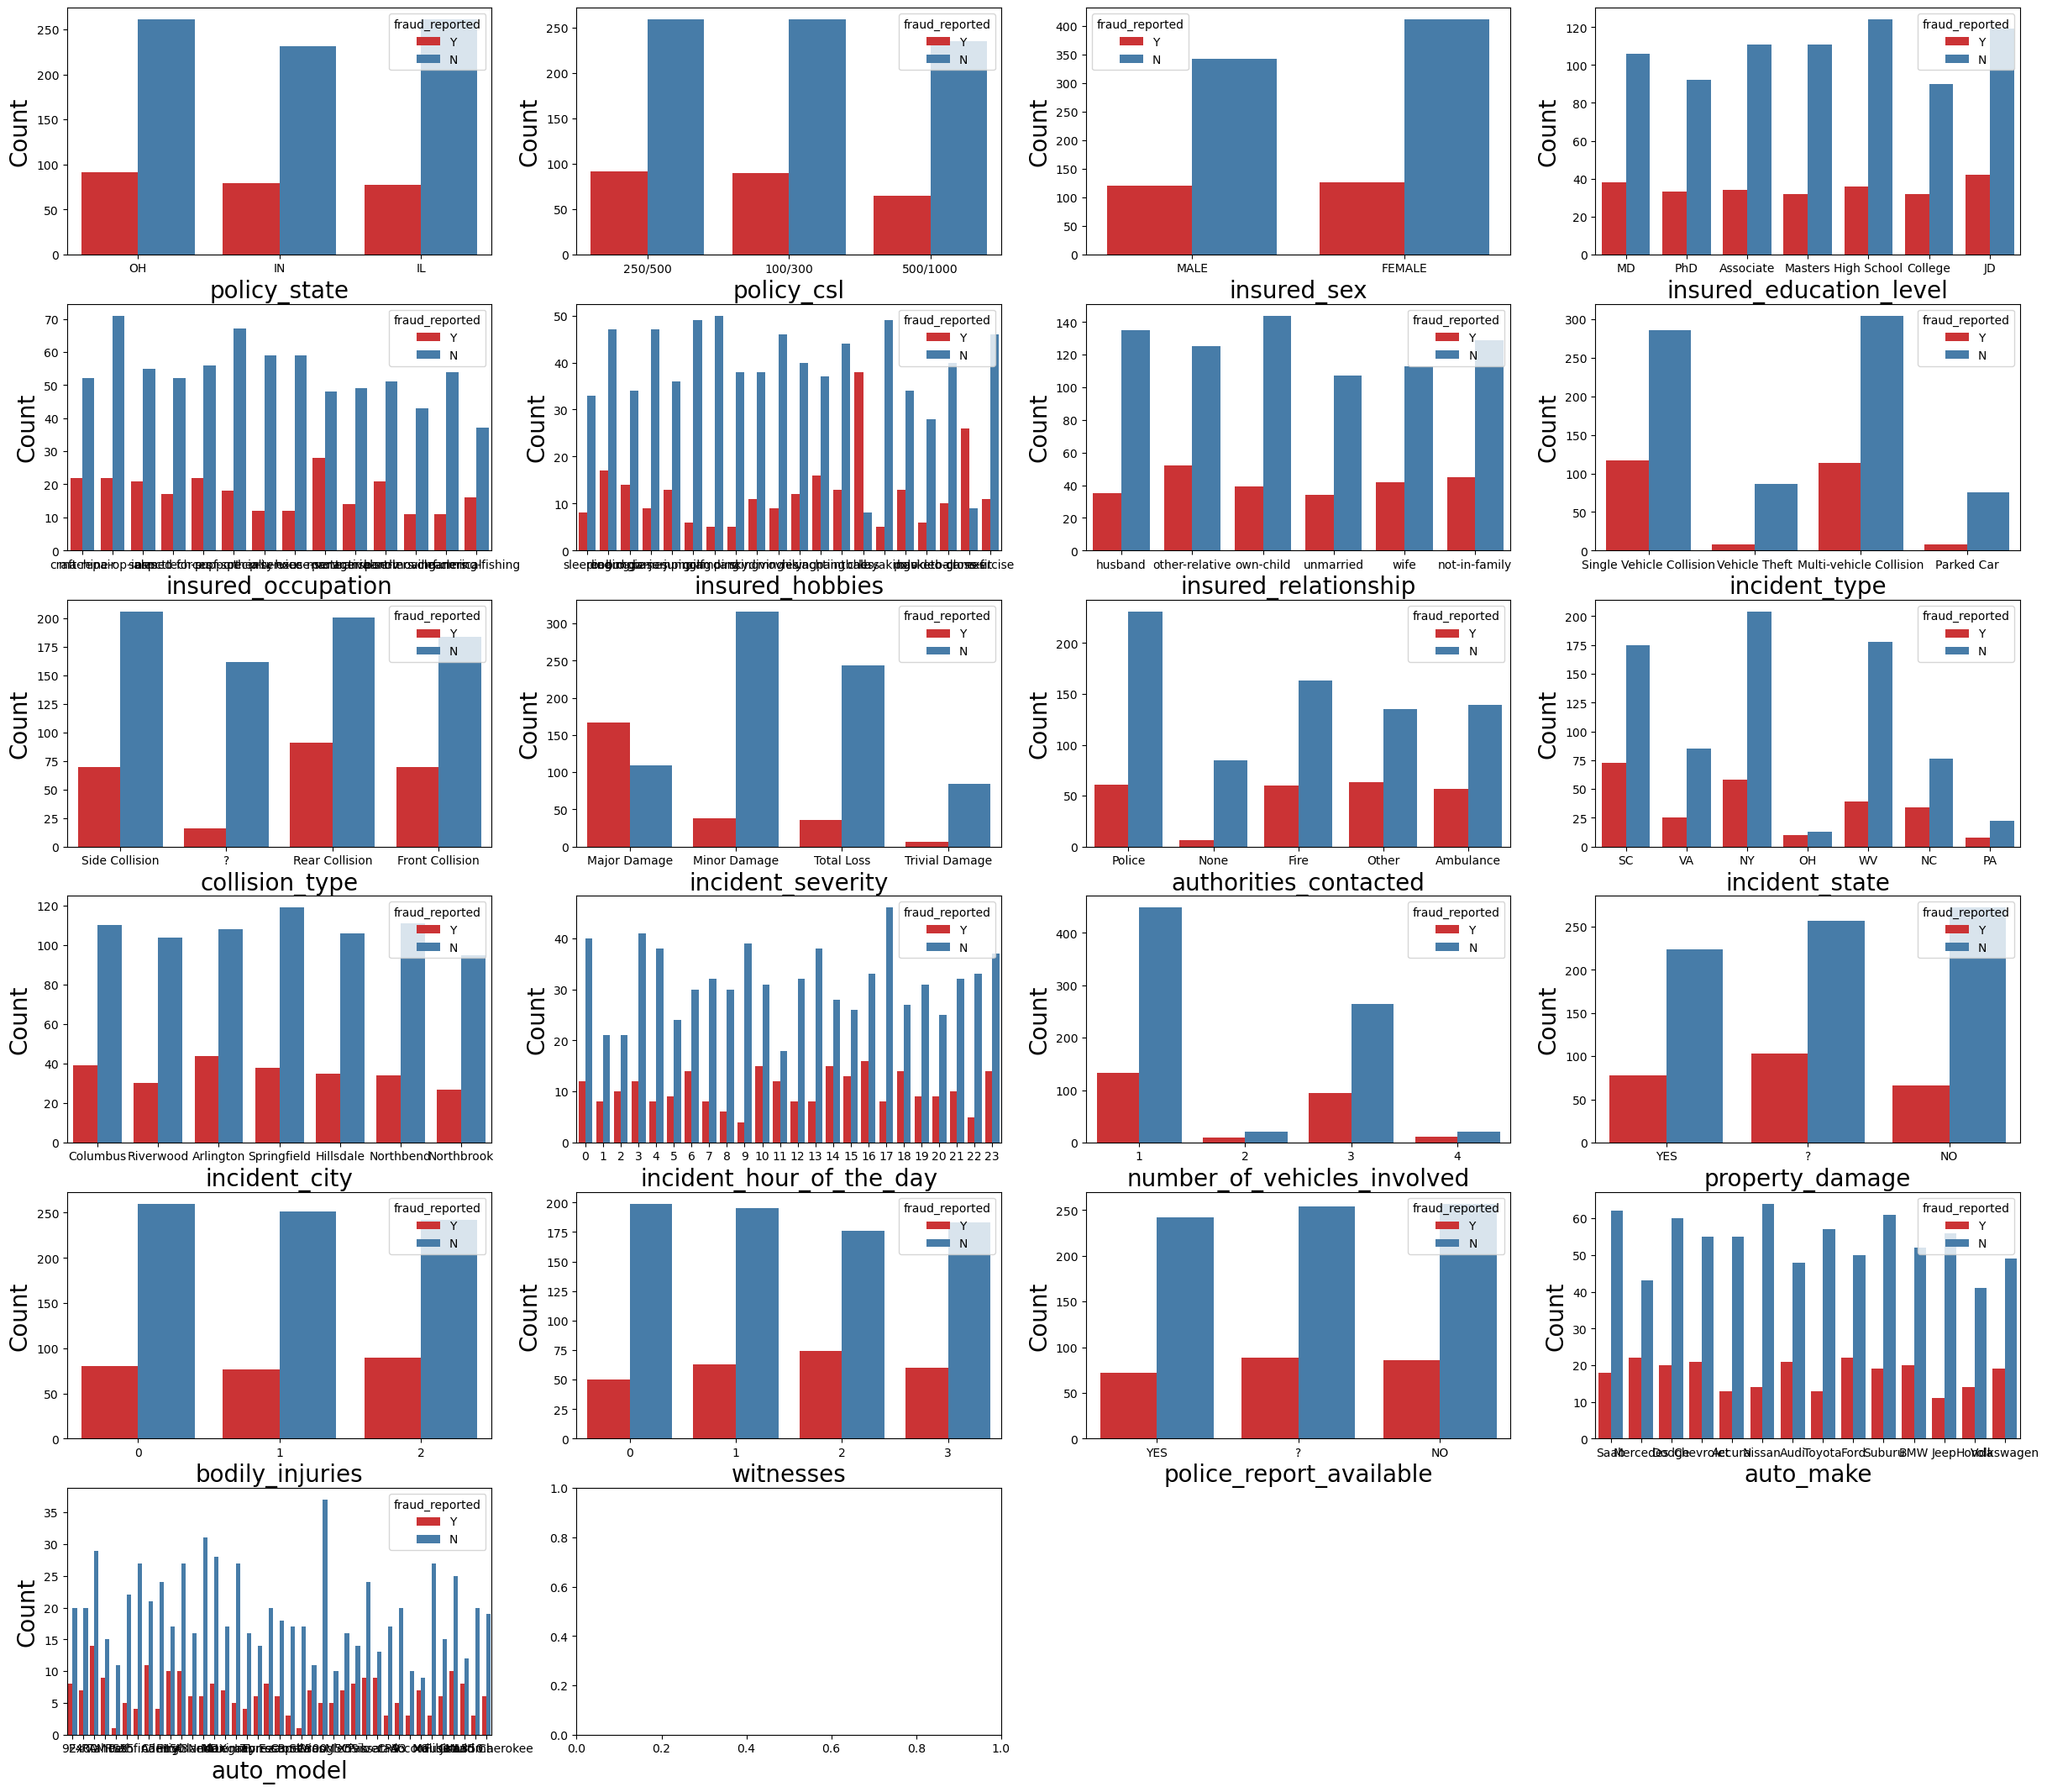

In [145]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
y = IDF['fraud_reported']
X = IDF.drop(columns=['fraud_reported','age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim'])
for col in X:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.countplot(x=col, hue='fraud_reported', data=IDF, palette="Set1")
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

policy state,policy csl,insured sex,authorities contacted,bodily injuries,incident city, witnesses don't seem to contribute to fraud probability.

Education levels of JD and Highschool and MD contribute most to the fraud claims filed.

relationships other relative and not in family contribute most to the fraud claims filed.

Single vehicle collision and multi vehicle collision contribute most to the fraud claims filed.

Incidents in states SC and NY contribute most to the fraud claims filed.

fraud claims are more for 1 and 3 vehicles involved in accident

fraud claims are more for rear collision in accident

fraud claims are most for Major damage reported

fraud claims are most for hours 10,14,16,18(office rush hours) and 23 of the day

fraud claims are more when no property damage is reported

fraud claims are more when no police report is available

fraud claims are more during months 1(january) and 2(february).

fraud claims are policy bind ages 2,4,13 and 14

fraud claims are most for car age 3,5,9,12,20,21.                                                                                                                                                    

<Axes: xlabel='auto_model', ylabel='count'>

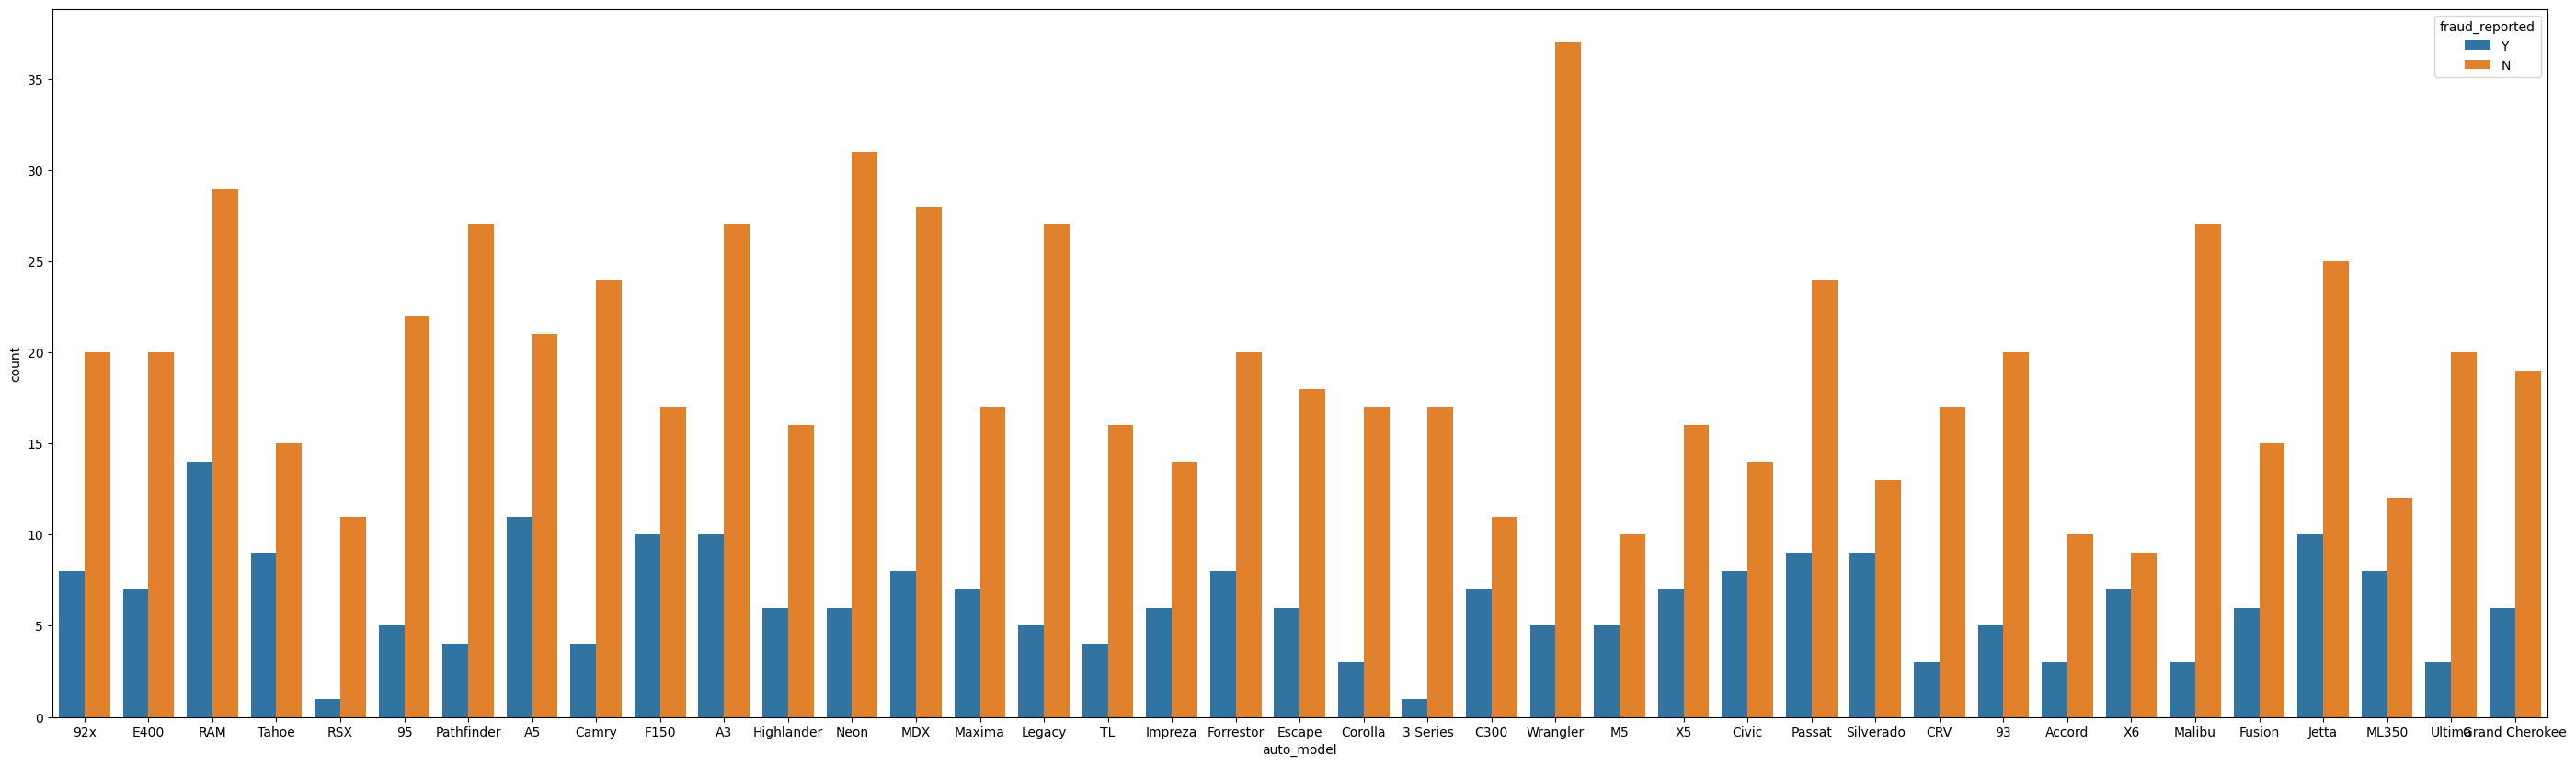

In [146]:
plt.figure(figsize=(35,10), facecolor='white')
sns.countplot(x='auto_model', hue='fraud_reported', data=IDF)

Ram,A5,Jetta,ML350,Passat,F150,A3 have the highest fraud insurance claims, while 3 series,RSX,Camry have the lowest.

Wrangler,Passat,95,Neon,Malibu,Grand Cherokee,auto_model_Ultima,Corolla,,TL,Legacy have the highest legitimate claims.

<Axes: xlabel='auto_make', ylabel='count'>

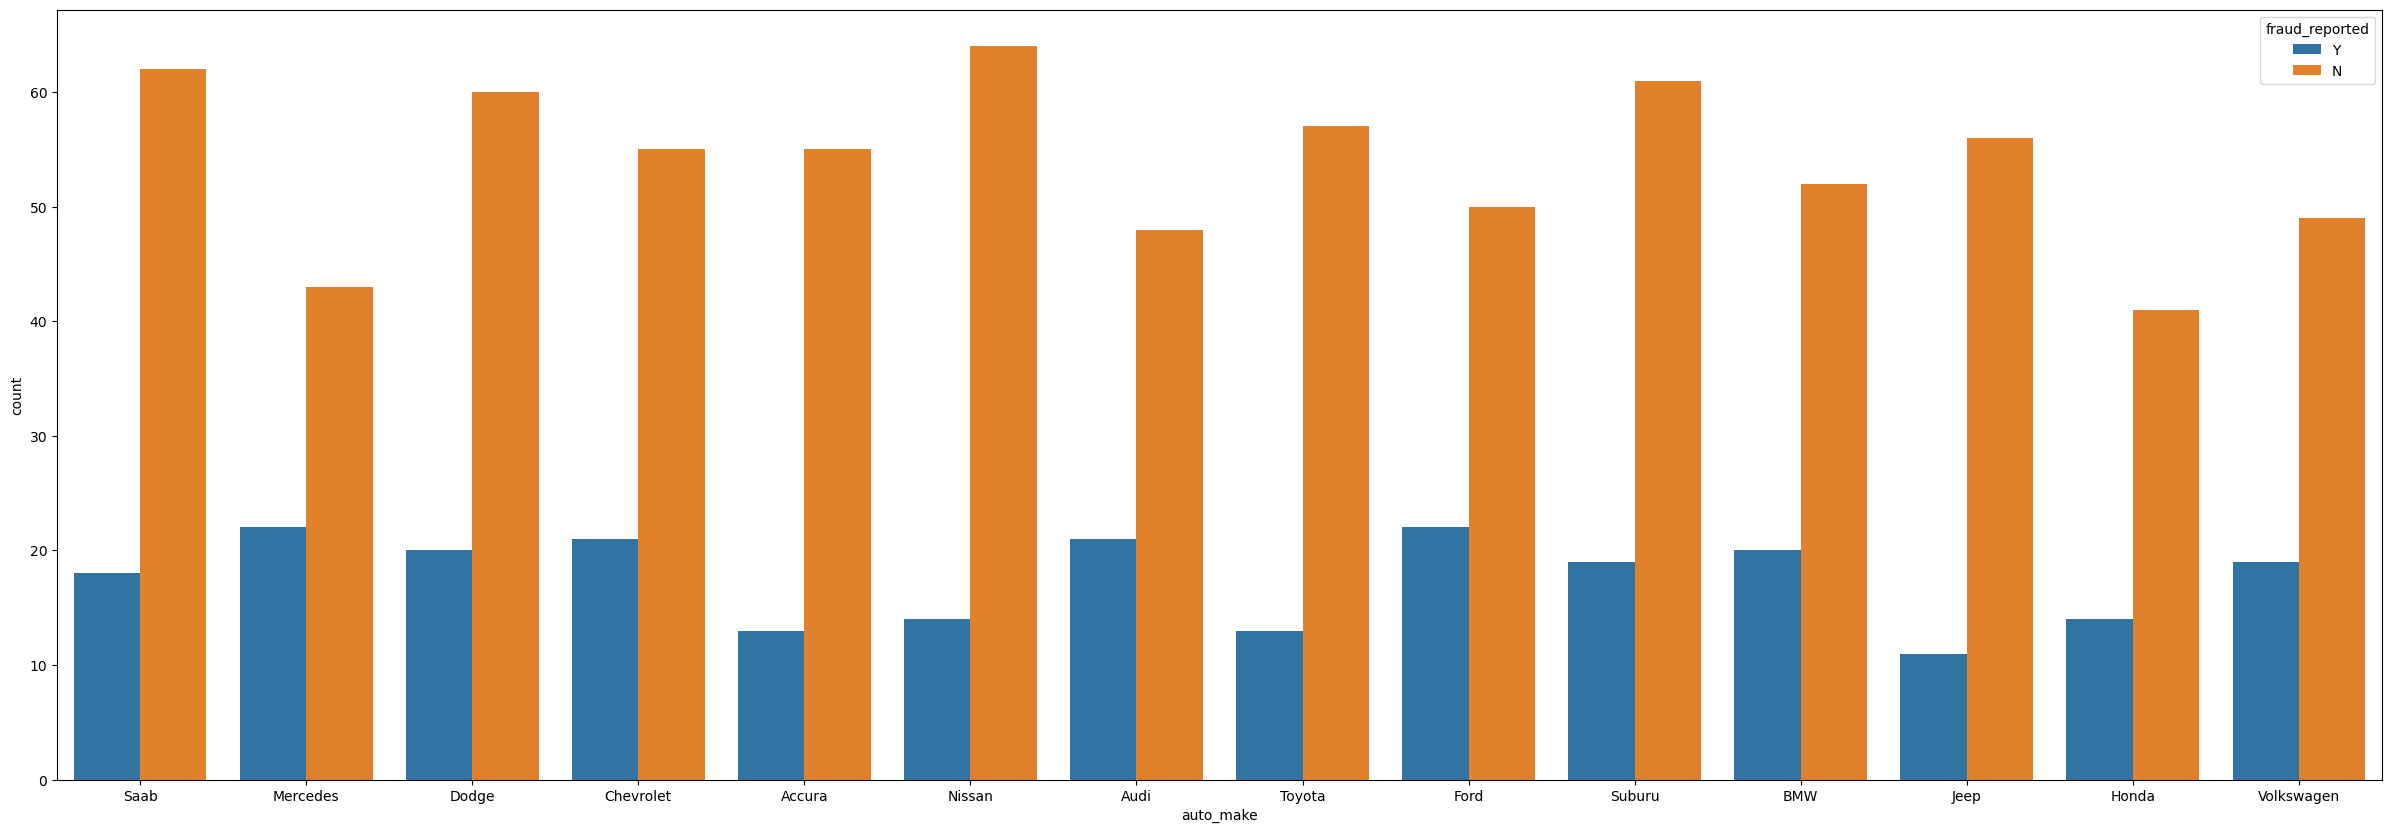

In [148]:
plt.figure(figsize=(30,10), facecolor='white')
sns.countplot(x='auto_make', hue='fraud_reported', data=IDF)

Mercedes,Dodge,Chevrolet,Audi,FOrd,Volkswagen have the highest fraud insurance claims

<Axes: xlabel='insured_occupation', ylabel='count'>

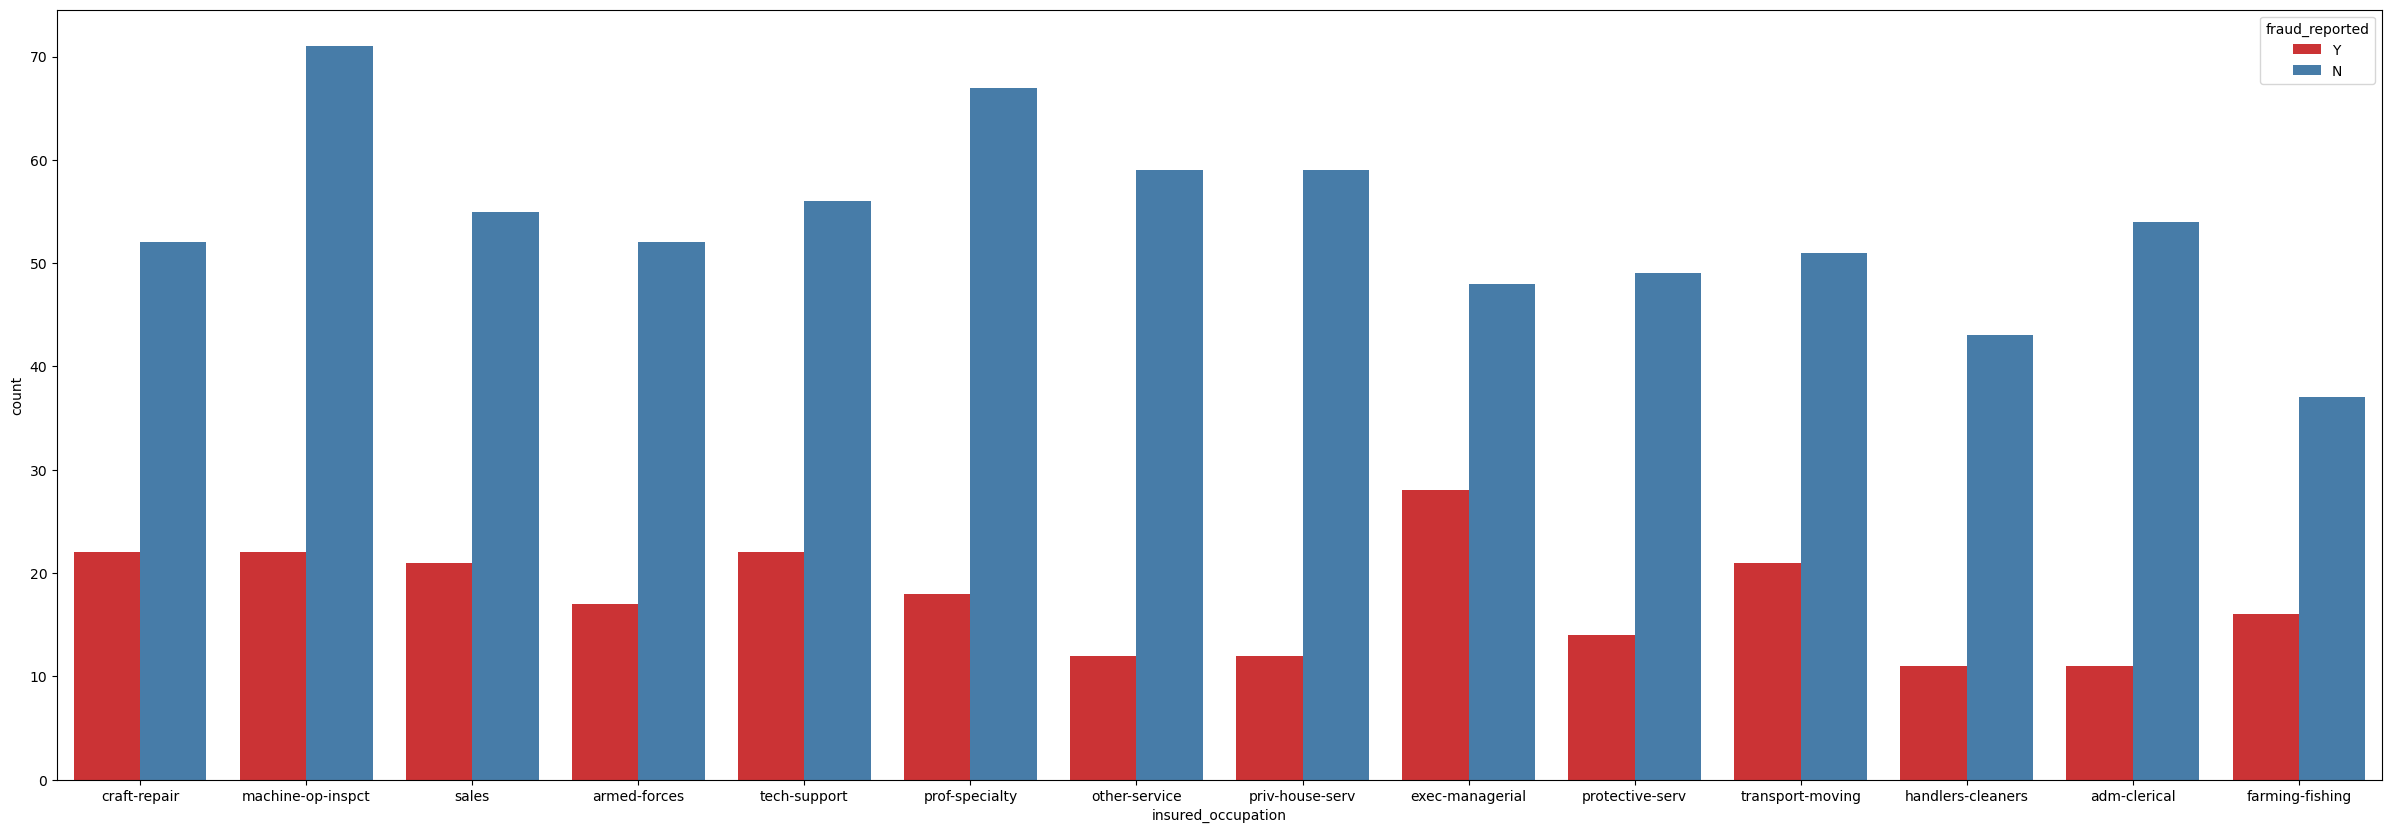

In [149]:
plt.figure(figsize=(30, 10), facecolor='white')
sns.countplot(data=IDF, x='insured_occupation', hue='fraud_reported', palette="Set1")

<Axes: xlabel='insured_hobbies', ylabel='count'>

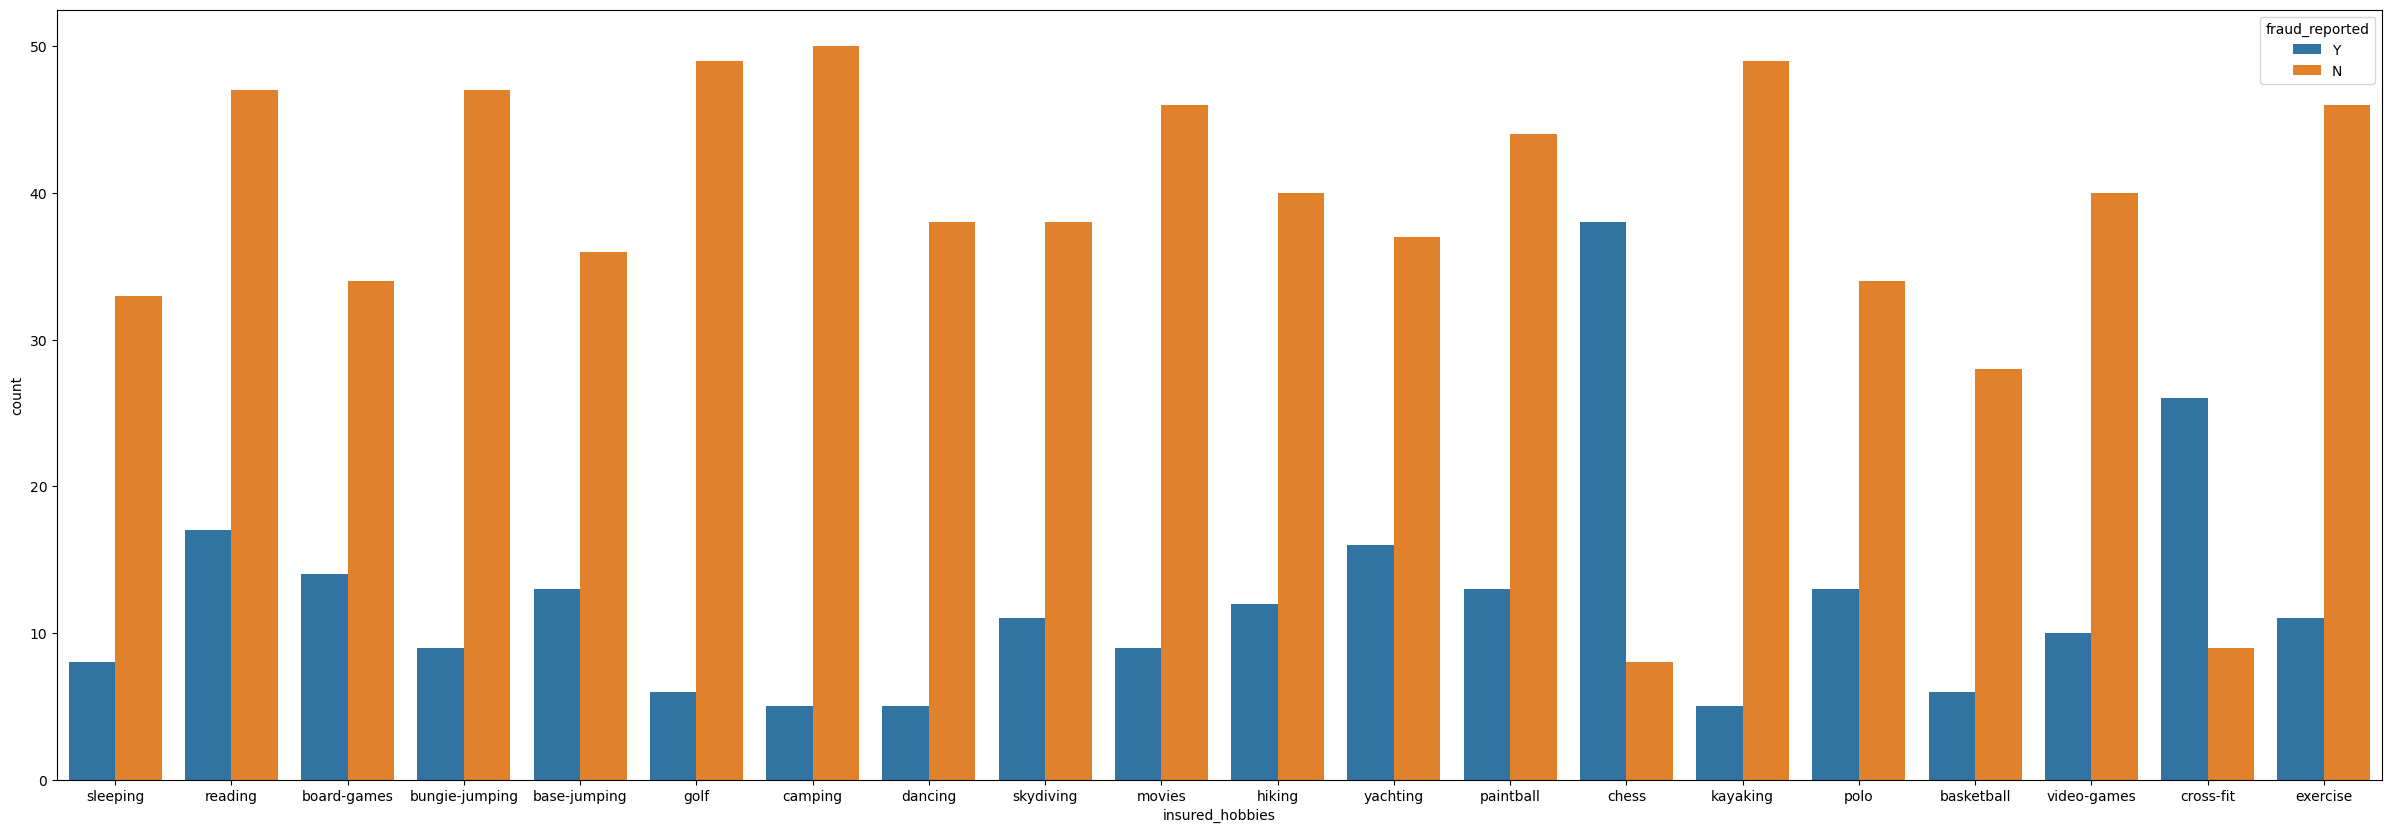

In [150]:
plt.figure(figsize=(30,10), facecolor='white')
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=IDF)

In [151]:

IDF.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
_c39                                NaN
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

Checking for Outliers in columns with continuous distribution

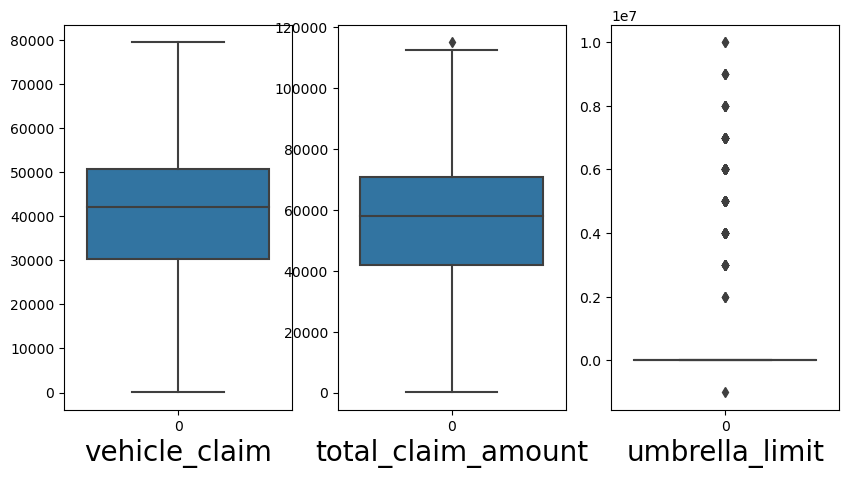

In [152]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for col in IDF[['vehicle_claim','total_claim_amount','umbrella_limit']]:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.boxplot(IDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There arent considerable outliers in the columns.

Checking for Skewness in Data

In [153]:
IDF.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
_c39                                NaN
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

Reducing skewness using PowerTransformer

In [154]:
from sklearn.preprocessing import PowerTransformer

In [155]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [156]:
df4 = IDF[['vehicle_claim','total_claim_amount']]

In [157]:
transformed= powtrans.fit_transform(df4)

In [158]:
transformed = pd.DataFrame(transformed, columns=df4.columns) 

In [159]:
transformed.skew()

vehicle_claim        -0.522718
total_claim_amount   -0.510354
dtype: float64

In [160]:
transformed.index = IDF.index

In [161]:
IDF[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]
IDF

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... injury_claim  \
0                        MD       craft-repair  ...         6510   
1                        MD  machine-op-inspct  ...          780   
2                       PhD              sales  ...         7700   
3                       PhD       armed-forces  ...         6340   
4                 Associate              sales  ...         1300   
..                      ...                ...  ...          ...   
995                 Masters       craft-repair  ...        17440   
996                     PhD     prof-specialty  ...        18080   
997                 Masters       armed-forces  ...         7500   
998               Associate  handlers-cleaners  ...         5220   
999               Associate              sales  ...          460   

    property_claim  vehicle_claim   auto_make auto_model fraud_reported _c39  \
0            13020       0.753697        Saab        92x              Y  NaN   
1              780      -1.786629    Mercedes       E400              Y  NaN   
2             3850      -0.820881       Dodge        RAM              N  NaN   
3             6340       0.677602   Chevrolet      Tahoe              Y  NaN   
4              650      -1.740038      Accura        RSX              N  NaN   
..             ...            ...         ...        ...            ...  ...   
995           8720       1.259186       Honda     Accord              N  NaN   
996          18080       1.904757  Volkswagen     Passat              N  NaN   
997           7500       0.777232      Suburu    Impreza              N  NaN   
998           5220      -0.104258        Audi         A5              N  NaN   
999            920      -1.779087    Mercedes       E400              N  NaN   

    Bind_Age incident_month auto_age  
0          2              1       12  
1         10              1        9  
2         16              2        9  
3         26             10        2  
4          2              2        7  
..       ...            ...      ...  
995       25              2       10  
996        2              1        1  
997       13              1       20  
998        5              2       18  
999       20              2        9  

[1000 rows x 37 columns]

Encoding the categorical Feature Column

In [162]:
IDF.dtypes[IDF.dtypes == 'object']

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [163]:
IDF.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim                   638
property_claim      

In [164]:
IDF['insured_sex'] = IDF.insured_sex.map({'MALE':1,'FEMALE':2})

In [165]:
IDF['police_report_available'] = IDF.property_damage.map({'YES':2,'NO':1})

In [166]:
IDF['property_damage'] = IDF.property_damage.map({'YES':2,'NO':1})

Encoding the categorical data using Label Encoding Technique

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
labenc = LabelEncoder()

In [169]:
categ = ['authorities_contacted','incident_severity','collision_type','incident_type','insured_relationship','insured_education_level','policy_csl','policy_state']

In [170]:
for col in categ:
    IDF[col] = labenc.fit_transform(IDF[col])

In [174]:
IDF['auto_make'] = labenc.fit_transform(IDF['auto_make'])

In [175]:
IDF.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            2   
3                1415.74         6000000            2   
4                1583.91         6000000            1   

   insured_education_level insured_occupation  ... injury_claim  \
0                        4       craft-repair  ...         6510   
1                        4  machine-op-inspct  ...          780   
2                        6              sales  ...         7700   
3                        6       armed-forces  ...         6340   
4                        0              sales  ...         1300   

   property_claim  vehicle_claim  auto_make  auto_model  fraud_reported  _c39  \
0           13020       0.753697         10         92x               Y   NaN   
1             780      -1.786629          8        E400               Y   NaN   
2            3850      -0.820881          4         RAM               N   NaN   
3            6340       0.677602          3       Tahoe               Y   NaN   
4             650      -1.740038          0         RSX               N   NaN   

   Bind_Age incident_month auto_age  
0         2              1       12  
1        10              1        9  
2        16              2        9  
3        26             10        2  
4         2              2        7  

[5 rows x 37 columns]

Encoding the Label Column.

In [177]:
IDF['fraud_reported'] = IDF.fraud_reported.map({'Y':1,'N':0})

In [178]:
IDF.dtypes[IDF.dtypes == 'object']

insured_occupation    object
insured_hobbies       object
incident_state        object
incident_city         object
auto_model            object
dtype: object

In [179]:
IDF2 = IDF[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()

In [180]:
dumm = pd.get_dummies(IDF[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model']],drop_first = False)

In [181]:
dumm.columns

Index(['insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
  

Creating a dataframe with the most important categories

In [182]:
dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3','auto_model_3 Series']].copy()

In [183]:
IDF = IDF.join(dumm2)

In [184]:
IDF.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)

In [185]:
IDF

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            2   
3                  1415.74         6000000            2   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            2   
996                1436.79               0            2   
997                1383.49         3000000            2   
998                1356.92         5000000            1   
999                 766.19               0            2   

     insured_education_level  insured_relationship  ...  auto_model_Camry  \
0                          4                     0  ...                 0   
1                          4                     2  ...                 0   
2                          6                     3  ...                 0   
3                          6                     4  ...                 0   
4                          0                     4  ...                 0   
..                       ...                   ...  ...               ...   
995                        5                     4  ...                 0   
996                        6                     5  ...                 0   
997                        5                     2  ...                 0   
998                        0                     5  ...                 0   
999                        0                     0  ...                 0   

     auto_model_RSX  auto_model_RAM  auto_model_A5  auto_model_Jetta  \
0                 0               0              0                 0   
1                 0               0              0                 0   
2                 0               1              0                 0   
3                 0               0              0                 0   
4                 1               0              0                 0   
..              ...             ...            ...               ...   
995               0               0              0                 0   
996               0               0              0                 0   
997               0               0              0                 0   
998               0               0              1                 0   
999               0               0              0                 0   

     auto_model_ML350  auto_model_Passat  auto_model_F150  auto_model_A3  \
0                   0                  0                0              0   
1                   0                  0                0              0   
2                   0                  0                0              0   
3                   0                  0                0              0   
4                   0                  0                0              0   
..                ...                ...              ...            ...   
995                 0                  0         

Finding Correlation

In [186]:
i_corr =IDF.corr()
i_corr

months_as_customer       age  policy_state  policy_csl  \
months_as_customer             1.000000  0.922098     -0.000328   -0.026819   
age                            0.922098  1.000000     -0.014533   -0.015185   
policy_state                  -0.000328 -0.014533      1.000000    0.001027   
policy_csl                    -0.026819 -0.015185      0.001027    1.000000   
policy_deductable              0.026807  0.029188      0.010033    0.003384   
...                                 ...       ...           ...         ...   
auto_model_ML350               0.074555  0.080563     -0.011008    0.035354   
auto_model_Passat              0.039533  0.020660      0.003626    0.053027   
auto_model_F150                0.002426 -0.013909      0.056620   -0.035885   
auto_model_A3                  0.006709  0.003435      0.009453    0.018533   
auto_model_3 Series           -0.043223 -0.038748     -0.047563   -0.010458   

                     policy_deductable  policy_annual_premium  umbrella_limit  \
months_as_customer            0.026807               0.005018        0.015498   
age                           0.029188               0.014404        0.018126   
policy_state                  0.010033               0.012455       -0.029580   
policy_csl                    0.003384               0.023978        0.021636   
policy_deductable             1.000000              -0.003245        0.010870   
...                                ...                    ...             ...   
auto_model_ML350             -0.043449              -0.012807       -0.021837   
auto_model_Passat             0.000110              -0.003951        0.033318   
auto_model_F150              -0.001735               0.004204        0.032976   
auto_model_A3                 0.034373               0.001783       -0.084756   
auto_model_3 Series          -0.005510              -0.006125        0.013698   

                     insured_sex  insured_education_level  \
months_as_customer     -0.060925                -0.000833   
age                    -0.073337                 0.000969   
policy_state            0.020481                -0.034327   
policy_csl              0.010757                 0.009153   
policy_deductable       0.009733                 0.015217   
...                          ...                      ...   
auto_model_ML350       -0.024925                 0.020832   
auto_model_Passat       0.025586                 0.020471   
auto_model_F150        -0.030921                -0.009764   
auto_model_A3           0.022641                 0.000702   
auto_model_3 Series     0.005038                -0.032395   

                     insured_relationship  ...  auto_model_Camry  \
months_as_customer               0.069727  ...         -0.039340   
age                              0.074832  ...         -0.041498   
policy_state                    -0.018506  ...         -0.039353   
policy_csl                      -0.030063  ...         -0.034887   
policy_deductable               -0.022945  ...          0.021727   
...                                   ...  ...               ...   
auto_model_ML350                 0.019896  ...         -0.024246   
auto_model_Passat               -0.022416  ...         -0.031354   
auto_model_F150                  0.024853  ...         -0.028273   
auto_model_A3                   -0.035920  ...         -0.033269   
auto_model_3 Series             -0.015615  ...         -0.022979   

                     auto_model_RSX  auto_model_RAM  auto_model_A5  \
months_as_customer        -0.000036        0.001113      -0.047632   
age                       -0.004399       -0.006887      -0.036281   
policy_state               0.009200       -0.033250      -0.044111   
policy_csl                 0.018137        0.019047      -0.038382   
policy_deductable         -0.017000        0.009286       0.057119   
...                             ...             ...            ...   
auto_model_ML350          -0.015744       -0.030282      -0

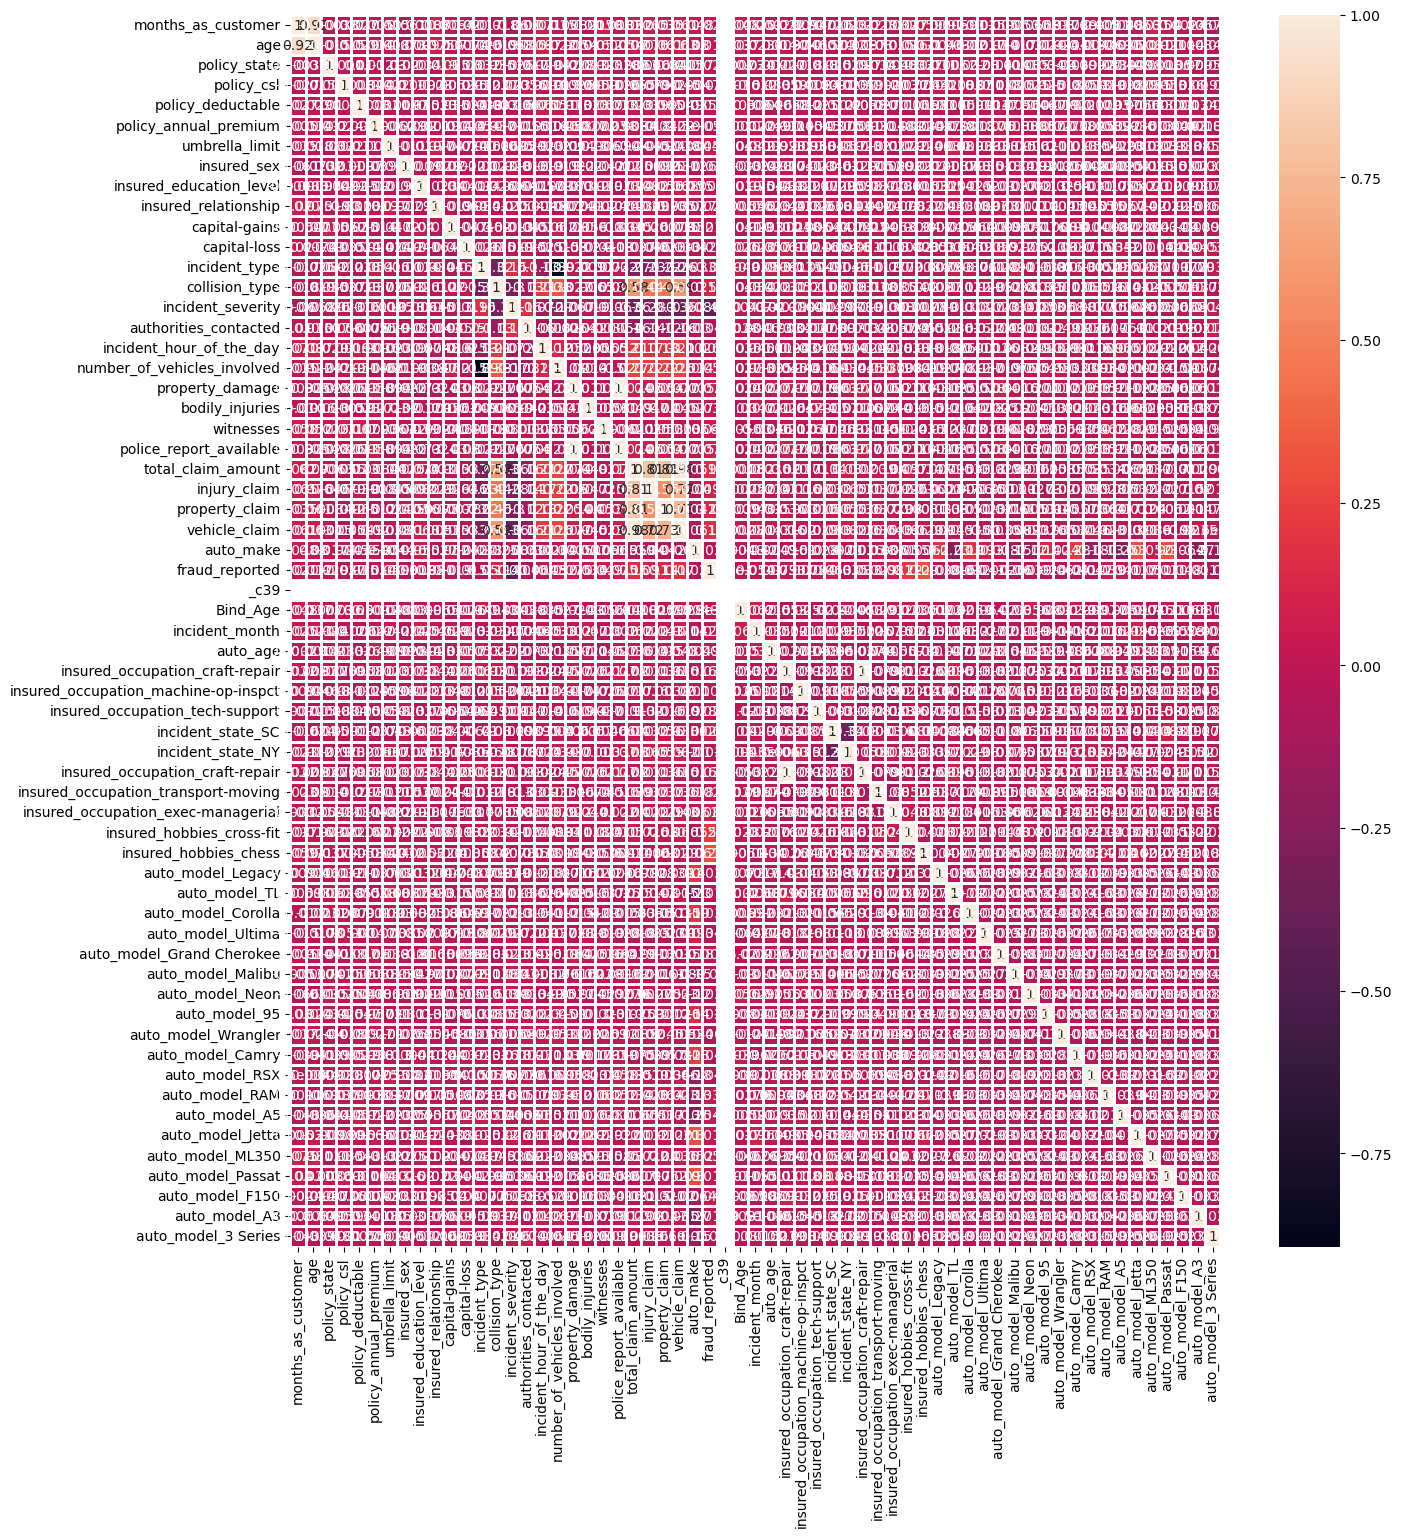

In [187]:
plt.figure(figsize=(15,16))
sns.heatmap(i_corr,annot=True,linewidth=1)
plt.show()

Visualizing correlation of feature columns with label column.

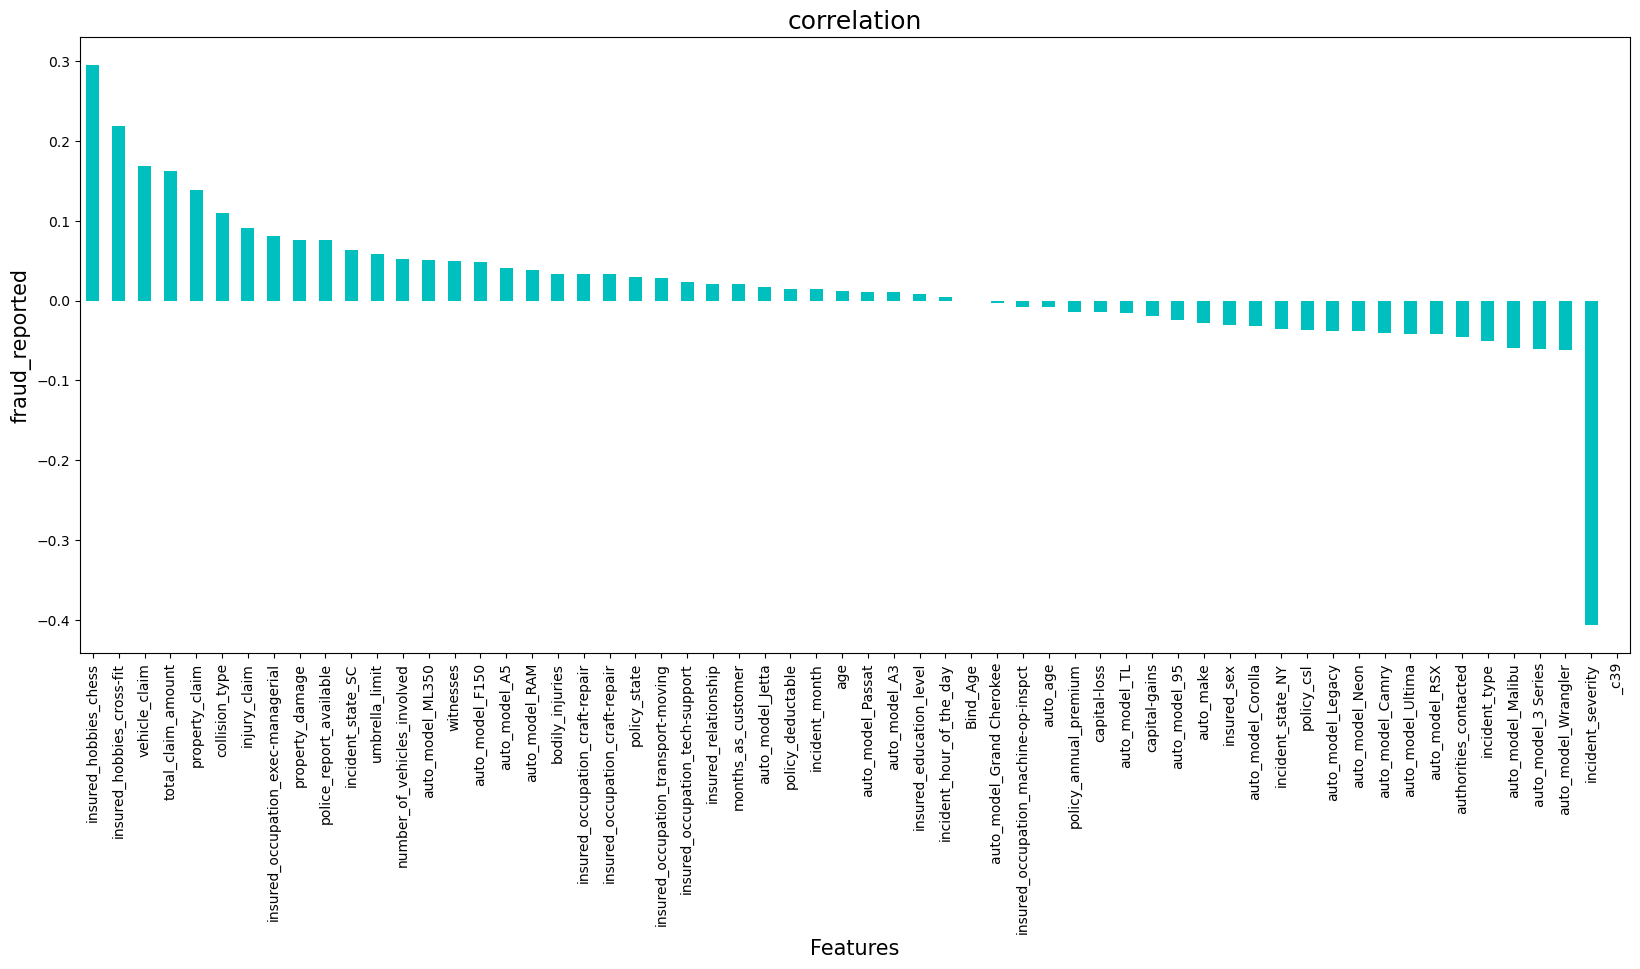

In [188]:
plt.figure(figsize = (20,8))
IDF.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Incident_severity hass the highest negative correlation with fraud_reported while, insured_hobbies_chess,insured_hobbies_cross-fit,vehicle_claim,total_claim_amount,property_claim have the highest positive correlation with fraud_reported


Feature Selection

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
X = IDF.drop(columns = ['fraud_reported'])
y = IDF['fraud_reported']

In [191]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

Checking for Multicollinearity using Variance Inflation Factor

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
vif = pd.DataFrame()

In [199]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your original DataFrame
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

# Check for missing values
print(scaled_X.isnull().sum())

# Handle missing values
# Option 1: Remove rows with missing values
scaled_X = scaled_X.dropna()

# Option 2: Impute missing values (example: fill with the mean of the column)
# scaled_X = scaled_X.fillna(scaled_X.mean())

# Convert back to NumPy array if needed
scaled_X_array = scaled_X.values

# Calculate VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(scaled_X_array, i) for i in range(scaled_X_array.shape[1])]

print(vif)


months_as_customer                         0
age                                        0
policy_state                               0
policy_csl                                 0
policy_deductable                          0
policy_annual_premium                      0
umbrella_limit                             0
insured_sex                                0
insured_education_level                    0
insured_relationship                       0
capital-gains                              0
capital-loss                               0
incident_type                              0
collision_type                             0
incident_severity                          0
authorities_contacted                      0
incident_hour_of_the_day                   0
number_of_vehicles_involved                0
property_damage                          360
bodily_injuries                            0
witnesses                                  0
police_report_available                  360
total_clai

ValueError: zero-size array to reduction operation maximum which has no identity